### epix10ka auto ranging response



In [113]:
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# datamask, i.e. drop MSB
DMASK = 0x3FFF
datfile = np.load('expmfxx32516run75smd_full2.npz', mmap_mode='r')

i0 = datfile['x']
iasic = datfile['y']
print(i0.shape)
print(iasic.shape)

(29403, 16)
(29403, 352, 384)


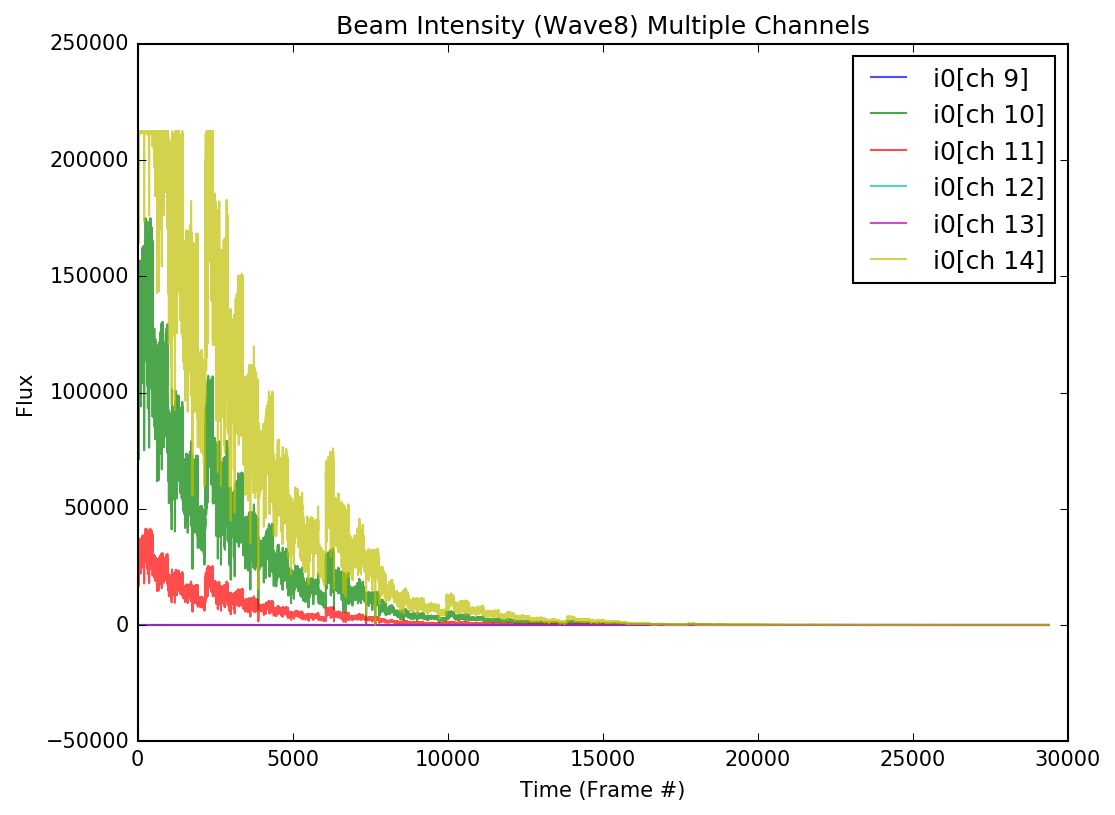

In [2]:
plt.figure(1,figsize=(8,6),dpi=150)

plt.plot(i0[:,9], alpha=0.7, label='i0[ch 9]')
plt.plot(i0[:,10], alpha=0.7, label='i0[ch 10]')
plt.plot(i0[:,11], alpha=0.7, label='i0[ch 11]')
plt.plot(i0[:,12], alpha=0.7, label='i0[ch 12]')
plt.plot(i0[:,13], alpha=0.7, label='i0[ch 13]')
plt.plot(i0[:,14], alpha=0.7, label='i0[ch 14]')

plt.xlabel('Time (Frame #)')
plt.ylabel('Flux')
plt.title('Beam Intensity (Wave8) Multiple Channels')
plt.legend()
plt.show()

(29403, 16)
(29403,)


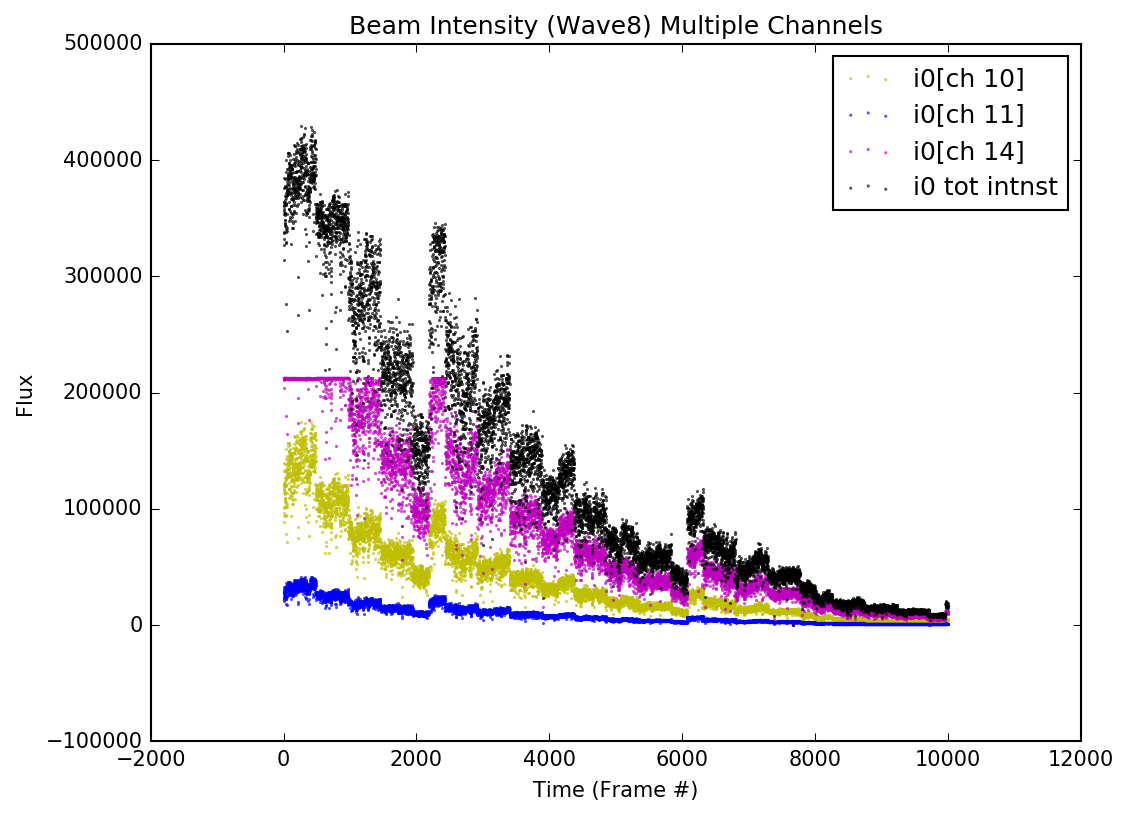

In [3]:
i0file = np.load('expmfxx32516run75smd_i0.npz', mmap_mode='r')

beami0 = i0file['i0']
beamtoti0 = -1*i0file['i0t']

print(beami0.shape)
print(beamtoti0.shape)

xbeam = np.arange(beamtoti0.shape[0])
beamfitcoeff = np.polyfit(xbeam,beamtoti0, 9)
bfit = np.poly1d(beamfitcoeff)
newbeam = bfit(xbeam)

flim = 10000
plt.figure(1,figsize=(8,6),dpi=150)
#plt.scatter(np.arange(flim), beami0[:flim,9], color='r', alpha=0.7, label='i0[ch 9]' , s=1, marker='.')
plt.scatter(np.arange(flim), beami0[:flim,10], color='y', alpha=0.7, label='i0[ch 10]' , s=1, marker='.')
plt.scatter(np.arange(flim), beami0[:flim,11], color='b', alpha=0.7, label='i0[ch 11]' , s=1, marker='.')
#plt.scatter(np.arange(flim), beami0[:flim,12], color='g', alpha=0.7, label='i0[ch 12]' , s=1, marker='.')
# plt.scatter(np.arange(flim), beami0[:flim,13], color='k', alpha=0.7, label='i0[ch 13]' , s=1, marker='.')
plt.scatter(np.arange(flim), beami0[:flim,14], color='m', alpha=0.7, label='i0[ch 14]' , s=1, marker='.')
plt.scatter(np.arange(flim), beamtoti0[:flim], color='k', alpha=0.7, label='i0 tot intnst', s=1, marker='.') 
# plt.plot(xbeam, newbeam, 'm-', linewidth=3, alpha=0.7, label='i0 tot intnst [fit]')

plt.xlabel('Time (Frame #)')
plt.ylabel('Flux')
plt.title('Beam Intensity (Wave8) Multiple Channels')
plt.legend()
plt.show()


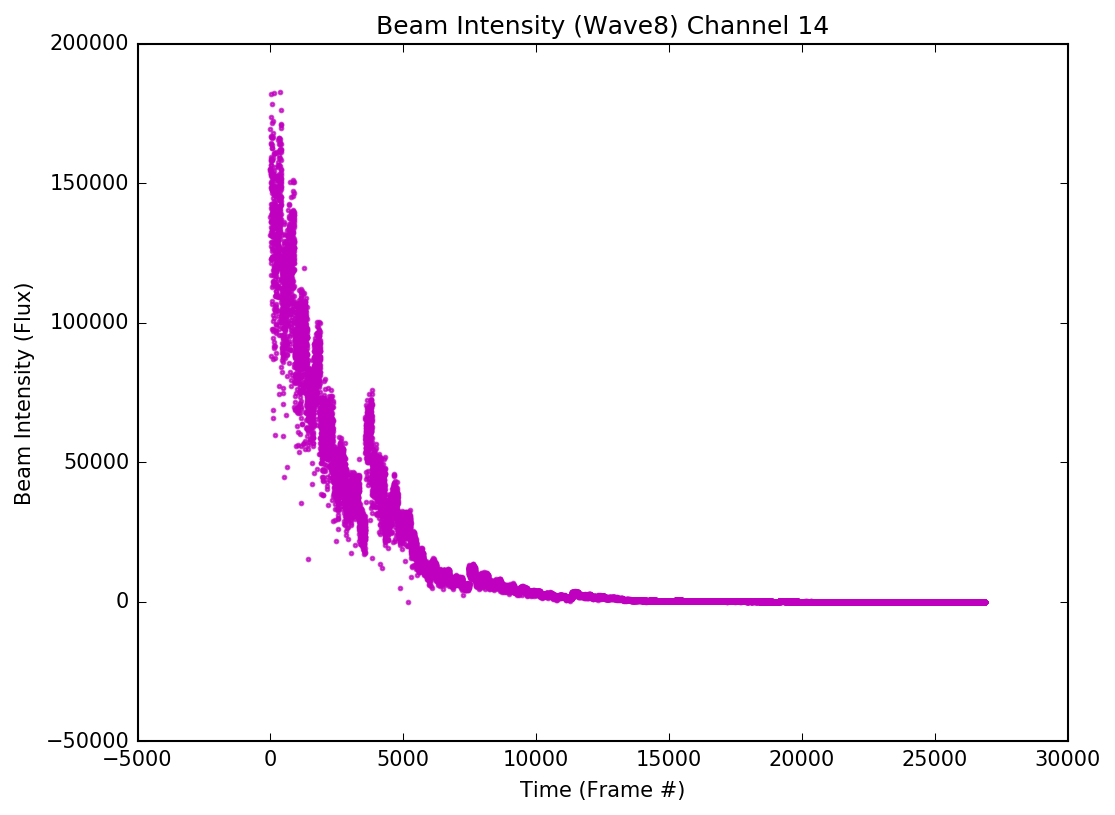

In [4]:
plt.figure(1,figsize=(8,6),dpi=150)
plt.scatter(np.arange(len(beami0[2500:,14])), beami0[2500:,14], color='m', alpha=0.7, label='i0[ch 14]' , s=3, marker='o')
plt.xlabel('Time (Frame #)')
plt.ylabel('Beam Intensity (Flux)')
plt.title('Beam Intensity (Wave8) Channel 14')
plt.show()

 ### discard beam before time = 2500 on channel 14, due to saturation
 # Let's take one slice of Time (frames) at a time

In [5]:
# select wave8 channel
wave8ch = 14

# set time slice of interest
time_min = 2500
time_max = 7500

# pixel of interest
px_x = 0
px_y = 27

# get pixel data
px = iasic[time_min:time_max, px_x, px_y] & DMASK
# get beam intensities
beami0_ch14 = beami0[time_min:time_max,wave8ch]

print(px.shape)
print(beami0_ch14.shape)

(5000,)
(5000,)


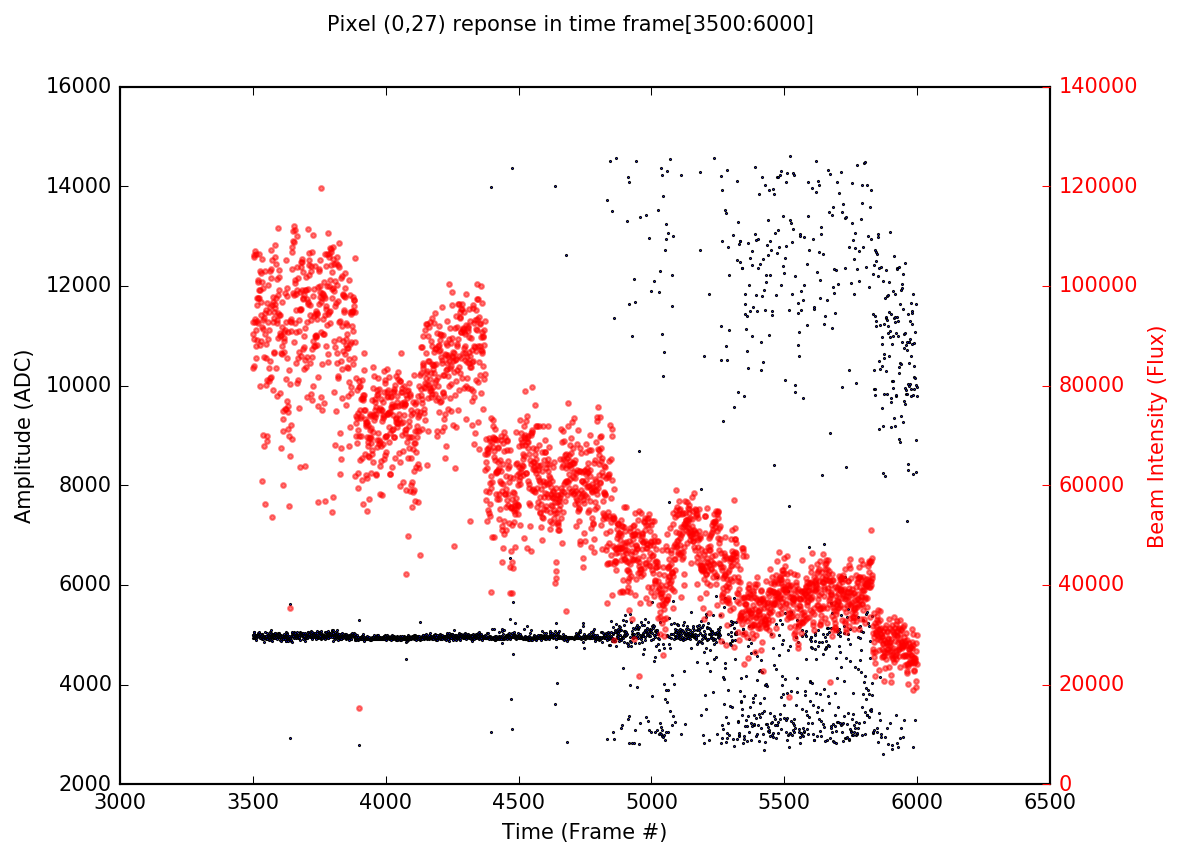

In [58]:
# lets plot it
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

ax1.scatter(np.arange(time_min,time_max), px, s=1, marker='.')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(np.arange(time_min,time_max), beami0_ch14, color='r', alpha=0.5, s=5, marker='o')
ax2.set_ylabel('Beam Intensity (Flux)', color='r')
ax2.tick_params('y', colors='r')
plt.show()

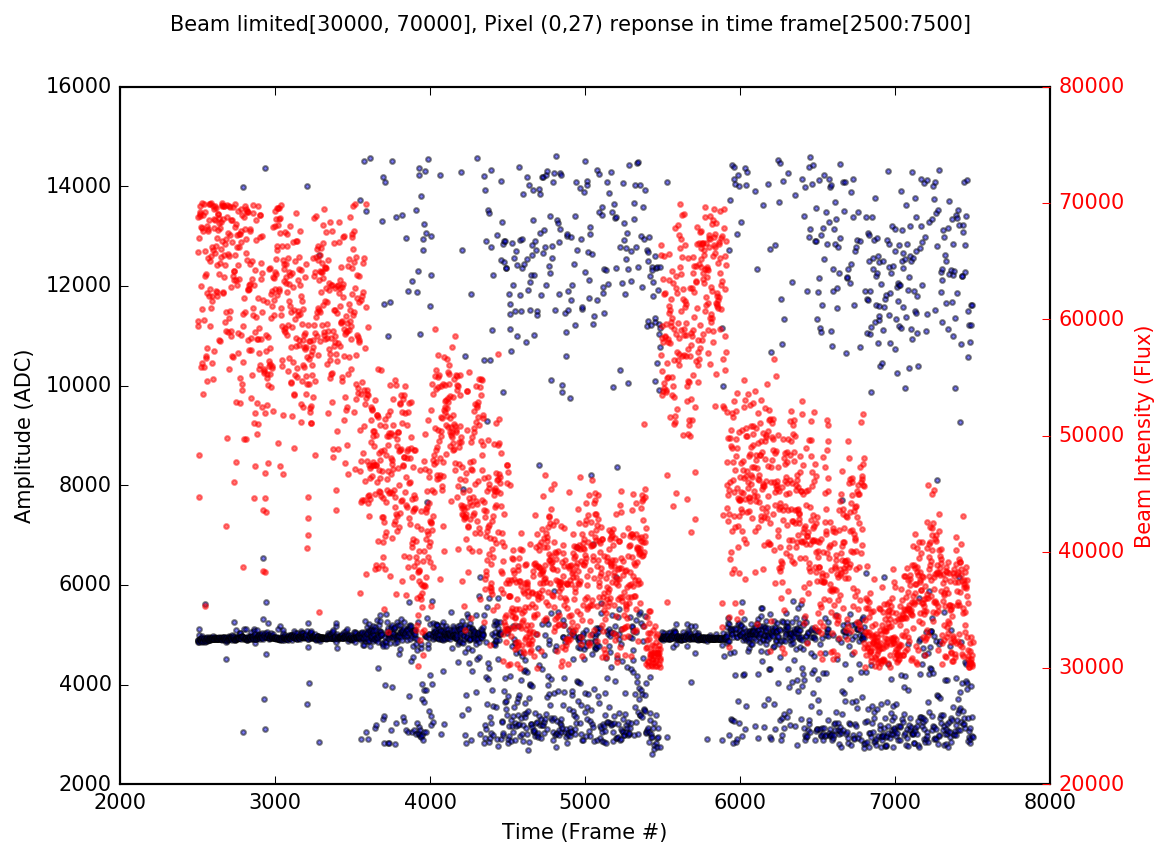

In [7]:
# limit beam values
beam_min = 30000
beam_max = 70000

# find the indices to these beam values
badindx = np.where(np.logical_and(beami0_ch14>beam_min, beami0_ch14<beam_max))

# get pixel data @ indices of interest
px_lim = px[badindx[0]]
# get beam data @ indx of interest
bm_lim = beami0_ch14[badindx[0]]

fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Beam limited[%d, %d]' % (beam_min, beam_max) + ', Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

# create a nice x-axis to match time slice
xbeam = np.linspace(time_min,time_max,len(badindx[0]))

ax1.scatter(xbeam, px_lim, alpha=0.5, s=5, marker='o')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(xbeam, bm_lim, color='r', alpha=0.5, label='i0[ch 14]' , s=5, marker='o')
ax2.set_ylabel('Beam Intensity (Flux)', color='r')
ax2.tick_params('y', colors='r')

plt.show()

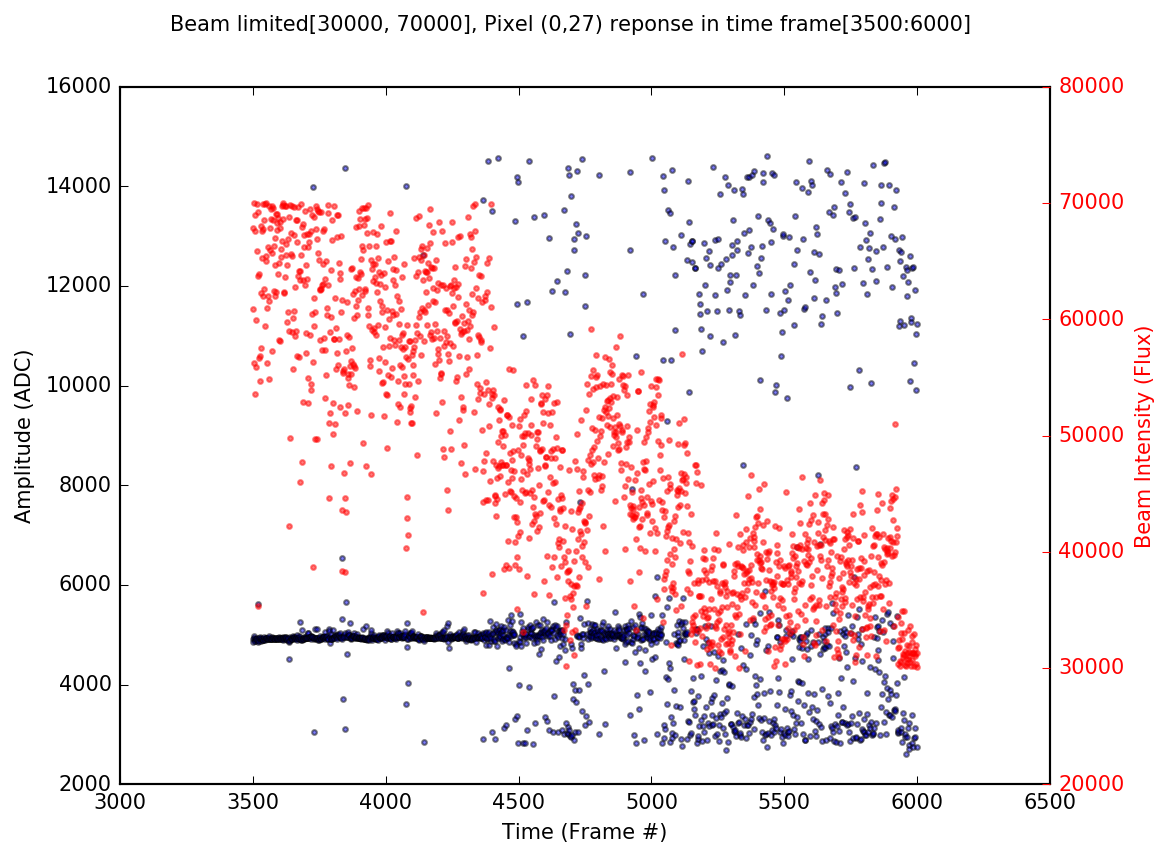

In [8]:
# zoom to region of interest

# set time slice of interest
time_min = 3500
time_max = 6000

# get pixel data
px = iasic[time_min:time_max, px_x, px_y] & DMASK
# get beam intensities
beami0_ch14 = beami0[time_min:time_max,wave8ch]

# limit beam values
beam_min = 30000
beam_max = 70000

# find the indices to these beam values
badindx = np.where(np.logical_and(beami0_ch14>beam_min, beami0_ch14<beam_max))

# get pixel data @ indices of interest
px_lim = px[badindx[0]]
# get beam data @ indx of interest
bm_lim = beami0_ch14[badindx[0]]

fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Beam limited[%d, %d]' % (beam_min, beam_max) + ', Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

# create a nice x-axis to match time slice
xbeam = np.linspace(time_min,time_max,len(badindx[0]))

ax1.scatter(xbeam, px_lim, alpha=0.5, s=5, marker='o')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(xbeam, bm_lim, color='r', alpha=0.5, label='i0[ch 14]' , s=5, marker='o')
ax2.set_ylabel('Beam Intensity (Flux)', color='r')
ax2.tick_params('y', colors='r')

plt.show()

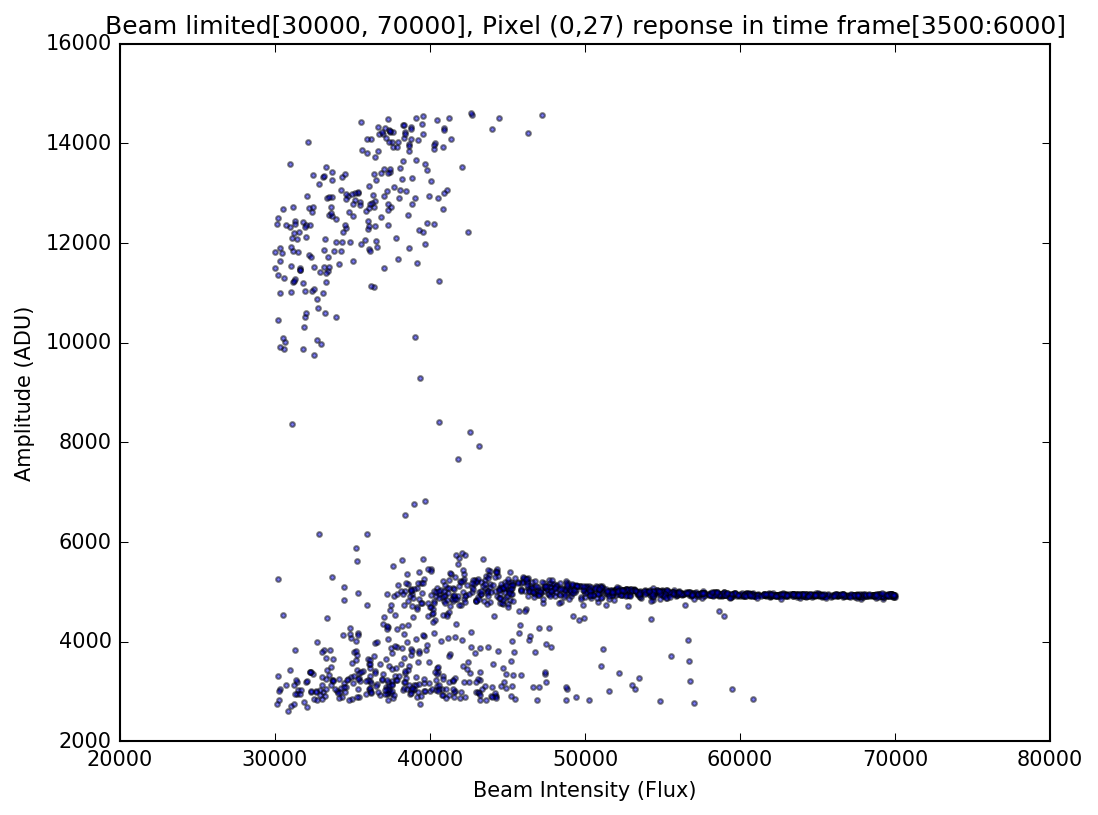

In [9]:
plt.figure(1,figsize=(8,6),dpi=150)
plt.scatter(bm_lim, px_lim, s=5, alpha=0.5, marker='o', label='(0,27)')
plt.xlabel('Beam Intensity (Flux)')
plt.ylabel('Amplitude (ADU)')
plt.title('Beam limited[%d, %d]' % (beam_min, beam_max) + ', Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))
plt.show()

In [10]:
# select wave8 channel
wave8ch = 14

# set time slice of interest
time_min = 7500
time_max = 11500

# pixel of interest
px_x = 0
px_y = 27

# get pixel data
px = iasic[time_min:time_max, px_x, px_y] & DMASK
# get beam intensities
beami0_ch14 = beami0[time_min:time_max,wave8ch]

print(px.shape)
print(beami0_ch14.shape)

(4000,)
(4000,)


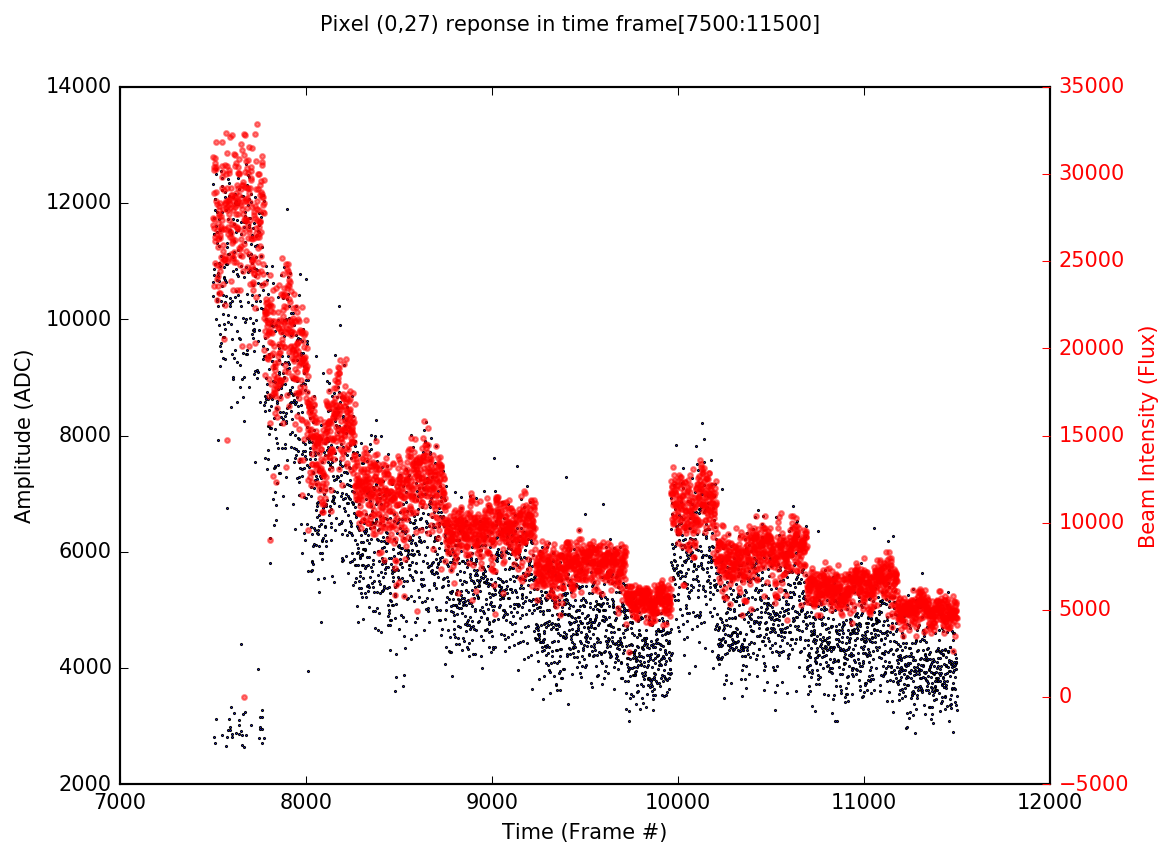

In [11]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

ax1.scatter(np.arange(time_min,time_max), px, s=1, marker='.')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(np.arange(time_min,time_max), beami0_ch14, color='r', alpha=0.5, label='i0[ch 14]' , s=5, marker='o')
ax2.set_ylabel('Beam Intensity (Flux)', color='r')
ax2.tick_params('y', colors='r')
plt.show()

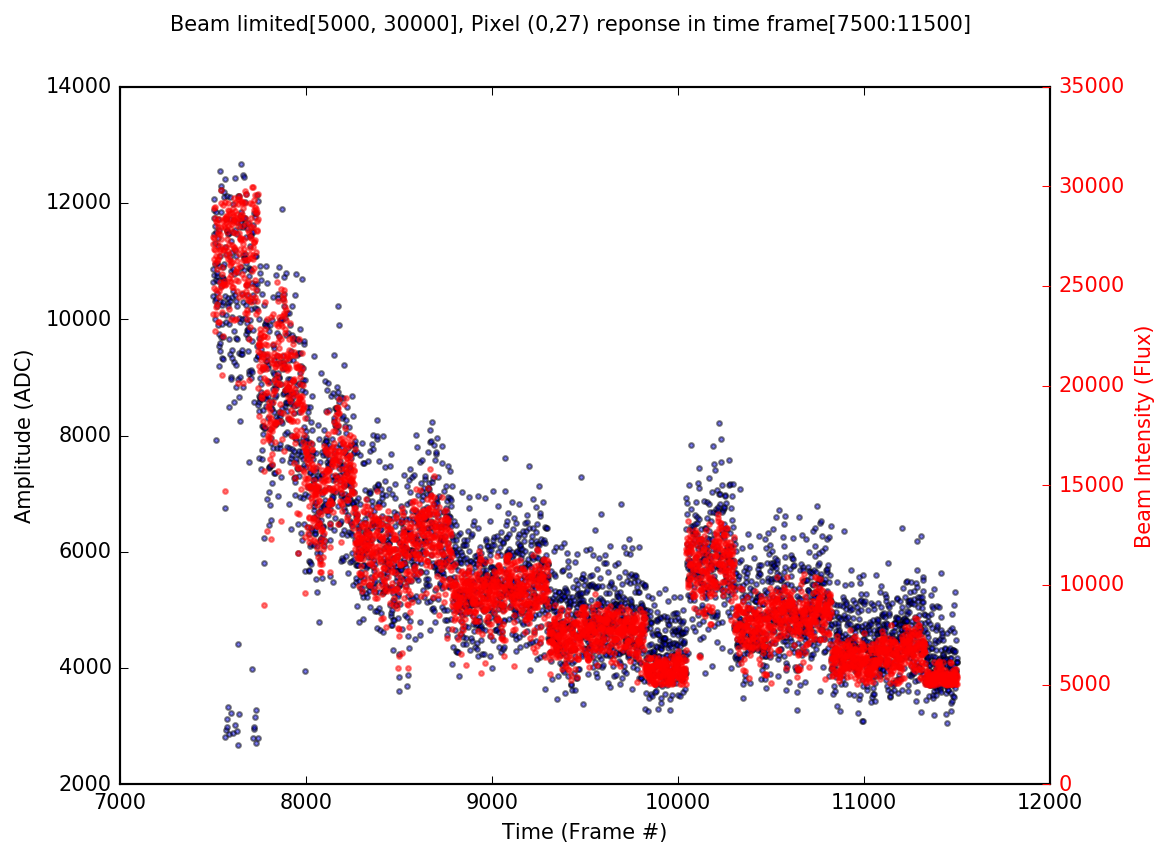

In [12]:
# limit beam values to time slice
beam_min = 5000
beam_max = 30000

# find the indices to these beam values
badindx = np.where(np.logical_and(beami0_ch14>beam_min, beami0_ch14<beam_max))

# get pixel data @ indices of interest
px_lim = px[badindx[0]]
# get beam data @ indx of interest
bm_lim = beami0_ch14[badindx[0]]

fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Beam limited[%d, %d]' % (beam_min, beam_max) + ', Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

# create a nice x-axis to match time slice
xbeam = np.linspace(time_min,time_max,len(badindx[0]))

ax1.scatter(xbeam, px_lim, alpha=0.5, s=5, marker='o')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(xbeam, bm_lim, color='r', alpha=0.5, label='i0[ch 14]' , s=5, marker='o')
ax2.set_ylabel('Beam Intensity (Flux)', color='r')
ax2.tick_params('y', colors='r')

plt.show()

In [13]:
# select wave8 channel
wave8ch = 14

# set time slice of interest
time_min = 11500
time_max = 15500

# pixel of interest
px_x = 0
px_y = 27

# get pixel data
px = iasic[time_min:time_max, px_x, px_y] & DMASK
# get beam intensities
beami0_ch14 = beami0[time_min:time_max,wave8ch]

print(px.shape)
print(beami0_ch14.shape)

(4000,)
(4000,)


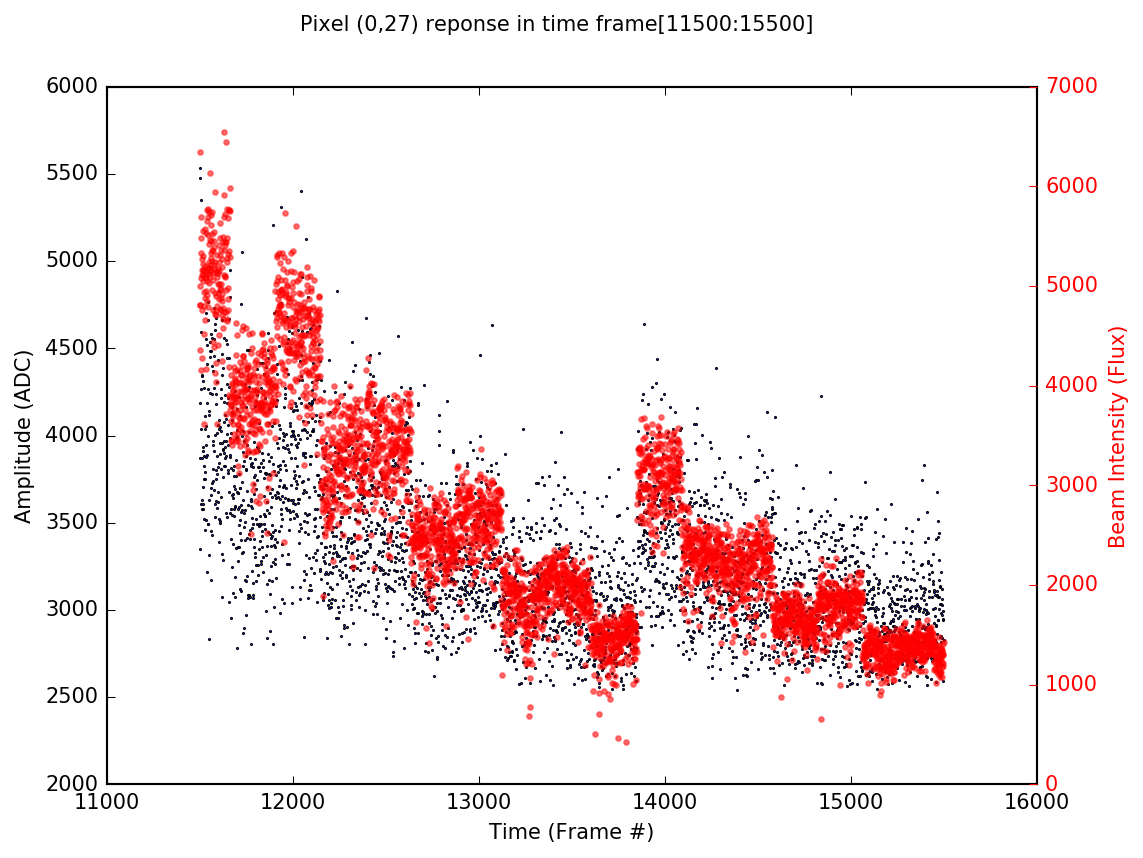

In [14]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

ax1.scatter(np.arange(time_min,time_max), px, s=1, marker='.')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(np.arange(time_min,time_max), beami0_ch14, color='r', alpha=0.5, label='i0[ch 14]' , s=5, marker='o')
ax2.set_ylabel('Beam Intensity (Flux)', color='r')
ax2.tick_params('y', colors='r')
plt.show()

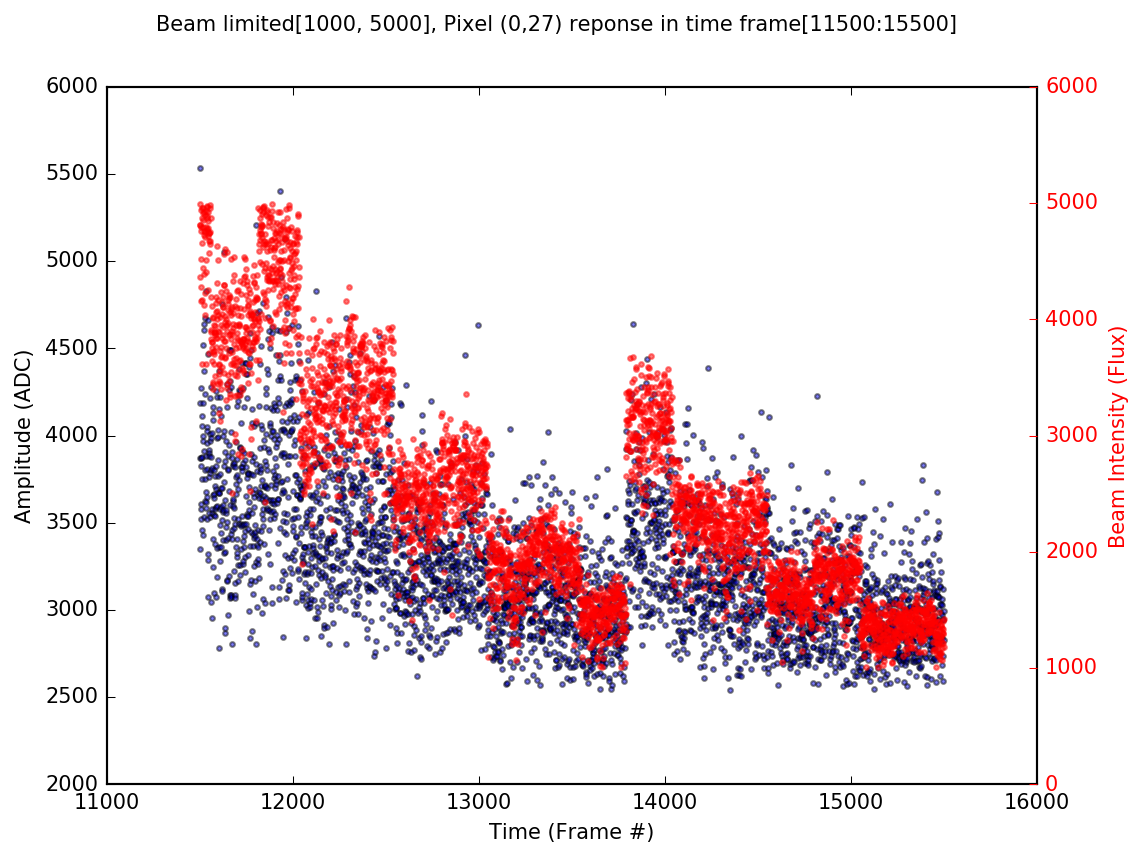

In [15]:
# limit beam values to time slice
beam_min = 1000
beam_max = 5000

# find the indices to these beam values
badindx = np.where(np.logical_and(beami0_ch14>beam_min, beami0_ch14<beam_max))

# get pixel data @ indices of interest
px_lim = px[badindx[0]]
# get beam data @ indx of interest
bm_lim = beami0_ch14[badindx[0]]

fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Beam limited[%d, %d]' % (beam_min, beam_max) + ', Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

# create a nice x-axis to match time slice
xbeam = np.linspace(time_min,time_max,len(badindx[0]))

ax1.scatter(xbeam, px_lim, alpha=0.5, s=5, marker='o')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(xbeam, bm_lim, color='r', alpha=0.5, label='i0[ch 14]' , s=5, marker='o')
ax2.set_ylabel('Beam Intensity (Flux)', color='r')
ax2.tick_params('y', colors='r')

plt.show()

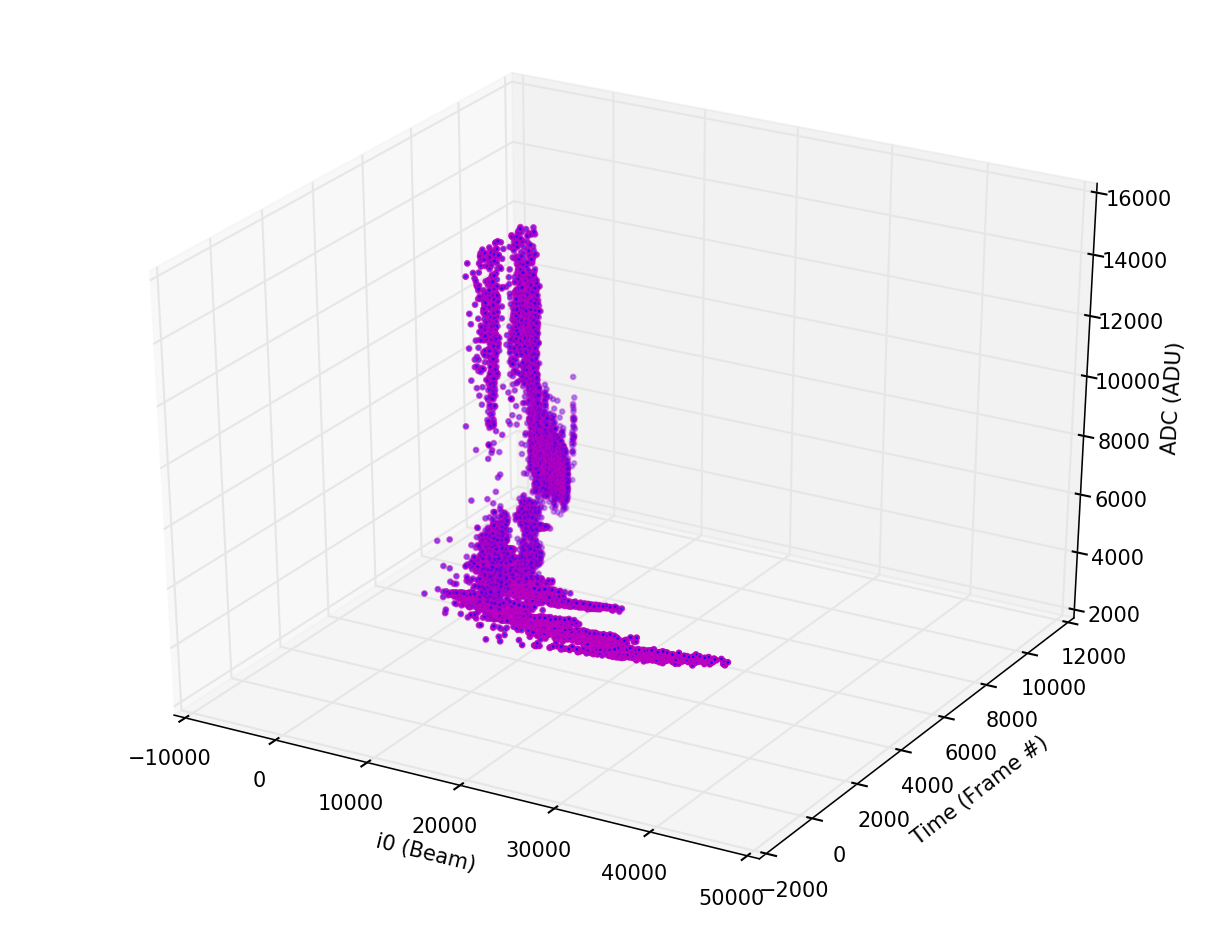

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(1,figsize=(8,6),dpi=150)
ax = Axes3D(fig)

y = np.arange(flim)
z = iasic[:flim, 0, 27] & 0x3FFF
x = i0[:flim,11]

ax.scatter(x, y, z, color='m', s=5, marker='o')

#ax.plot(x, z, 'k+', zdir='y')
#ax.plot(y, z, 'k+', zdir='x')
#ax.plot(x, y, 'k+', zdir='z')

#ax.plot(z, y, 'g+', zdir='-x')


ax.set_ylabel('Time (Frame #)')
ax.set_zlabel('ADC (ADU)')
ax.set_xlabel('i0 (Beam)')
plt.show()

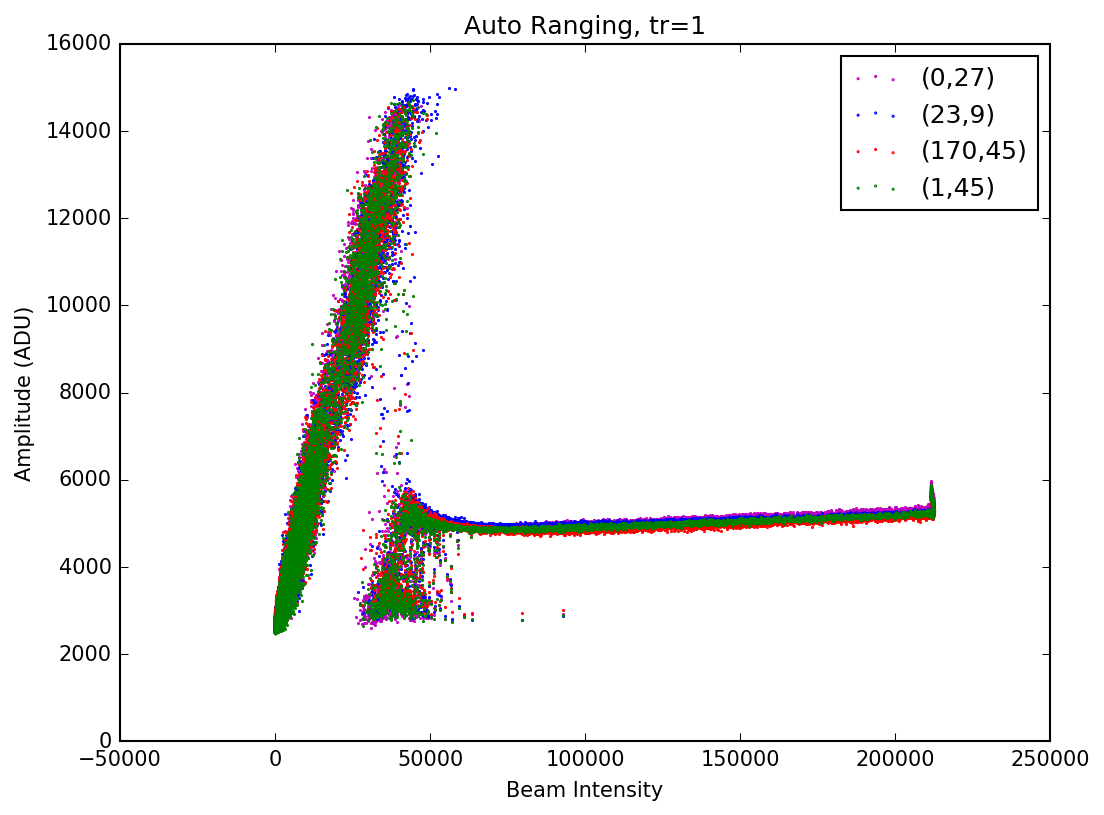

In [63]:
plt.figure(1,figsize=(8,6),dpi=150)
plt.scatter(i0[:,14], iasic[:, 0, 27] & 0x3FFF, color='m', s=1, marker='.', label='(0,27)')
plt.scatter(i0[:,14], iasic[:, 23, 9] & 0x3FFF, color='b', s=1, marker='.', label='(23,9)')
plt.scatter(i0[:,14], iasic[:, 170, 45] & 0x3FFF, color='r', s=1, marker='.', label='(170,45)')
plt.scatter(i0[:,14], iasic[:, 1, 45] & 0x3FFF, color='g', s=1, marker='.', label='(1,45)')
plt.legend()
plt.xlabel('Beam Intensity')
plt.ylabel('Amplitude (ADU)')
plt.title('Auto Ranging, tr=1')
#plt.xlim([3000,6500])
plt.show()

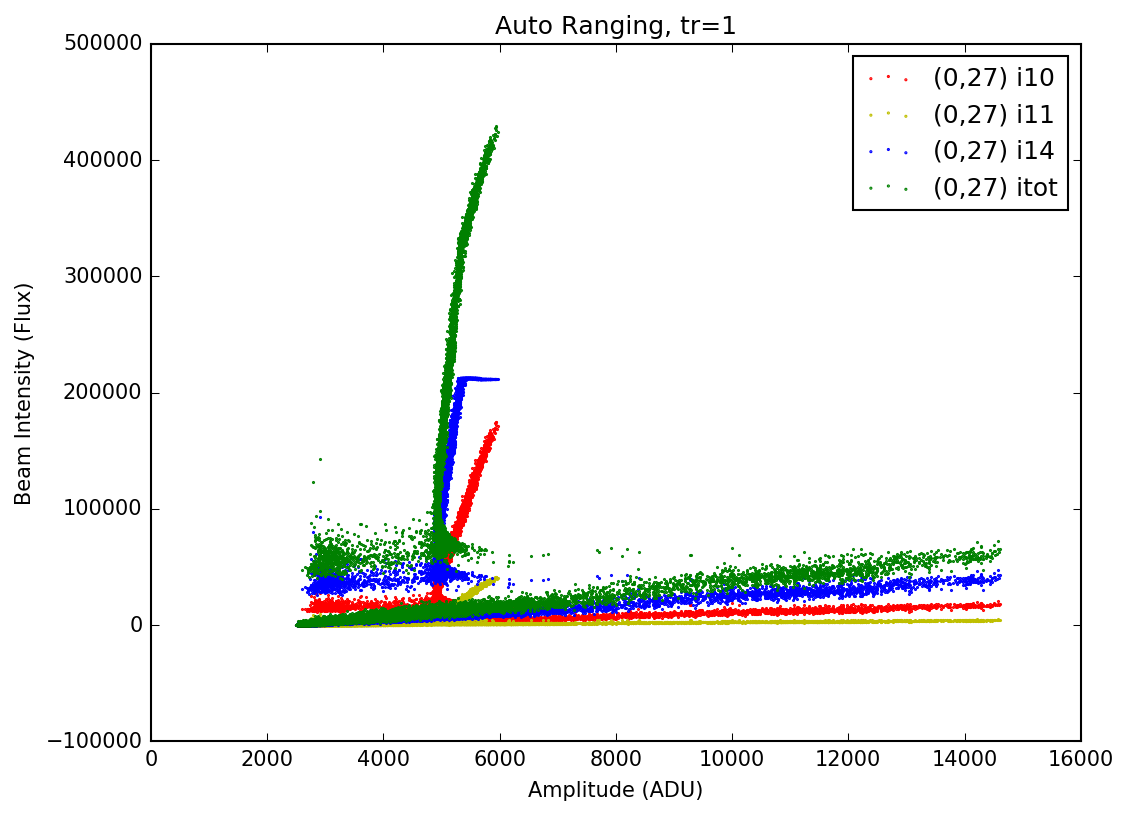

In [18]:
plt.figure(1,figsize=(8,6),dpi=150)
plt.scatter(iasic[:, 0, 27] & 0x3FFF, i0[:,10], color='r', s=1, marker='.', label='(0,27) i10')
plt.scatter(iasic[:, 0, 27] & 0x3FFF, i0[:,11], color='y', s=1, marker='.', label='(0,27) i11')
plt.scatter(iasic[:, 0, 27] & 0x3FFF, i0[:,14], color='b', s=1, marker='.', label='(0,27) i14')
plt.scatter(iasic[:, 0, 27] & 0x3FFF, beamtoti0, color='g', s=1, marker='.', label='(0,27) itot')


plt.legend()
plt.xlabel('Amplitude (ADU)')
plt.ylabel('Beam Intensity (Flux)')
plt.title('Auto Ranging, tr=1')
plt.show()


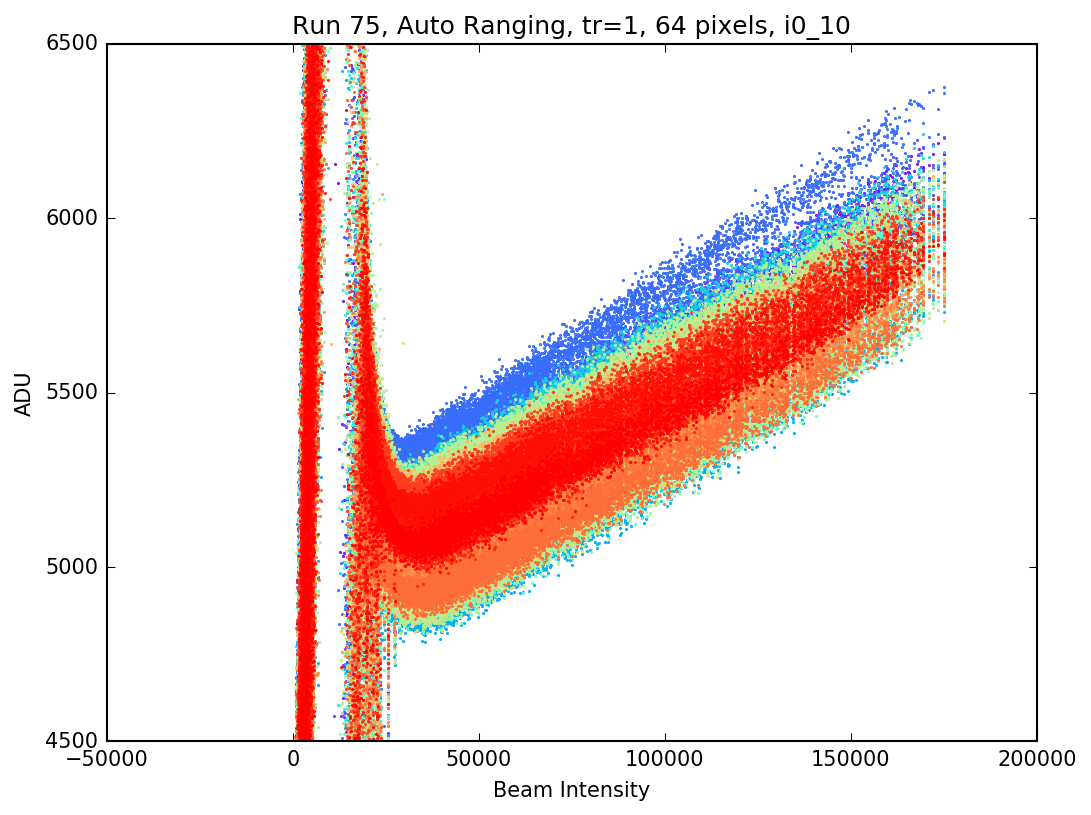

In [19]:
iasic2d = iasic.reshape(iasic.shape[0], iasic.shape[2]*iasic.shape[1])
plt.figure(1,figsize=(8,6),dpi=150)

n=64
color=iter(cm.rainbow(np.linspace(0,1,n)))
for i in range(n):
    c=next(color)
    plt.scatter(i0[:,10], iasic2d[:, (i+10)*20] & 0x3FFF, s=1, marker='.', color=c)

    
plt.xlabel('Beam Intensity')
plt.ylabel('ADU')
plt.title('Run 75, Auto Ranging, tr=1, 64 pixels, i0_10')
plt.ylim([4500,6500])
plt.show()

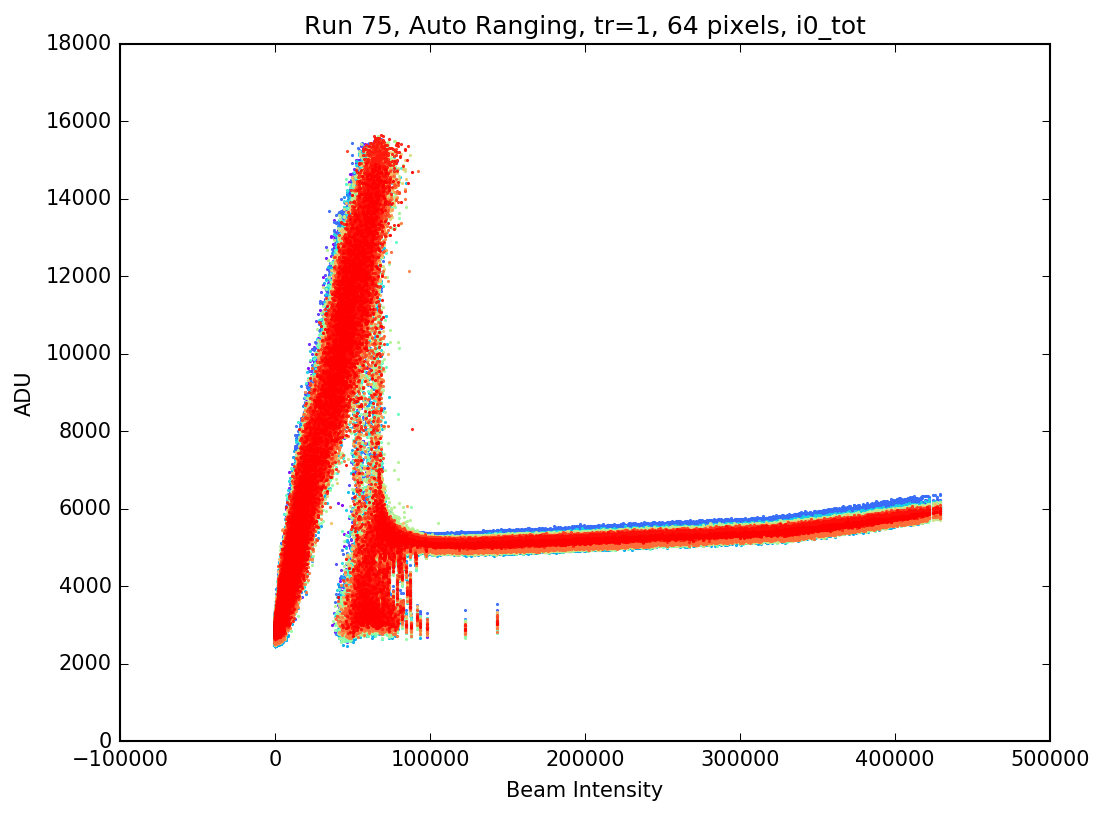

In [20]:
iasic2d = iasic.reshape(iasic.shape[0], iasic.shape[2]*iasic.shape[1])
plt.figure(1,figsize=(8,6),dpi=150)

n=64
color=iter(cm.rainbow(np.linspace(0,1,n)))
for i in range(n):
    c=next(color)
    plt.scatter(beamtoti0, iasic2d[:, (i+10)*20] & 0x3FFF, s=1, marker='.', color=c)

    
plt.xlabel('Beam Intensity')
plt.ylabel('ADU')
plt.title('Run 75, Auto Ranging, tr=1, 64 pixels, i0_tot')
plt.show()


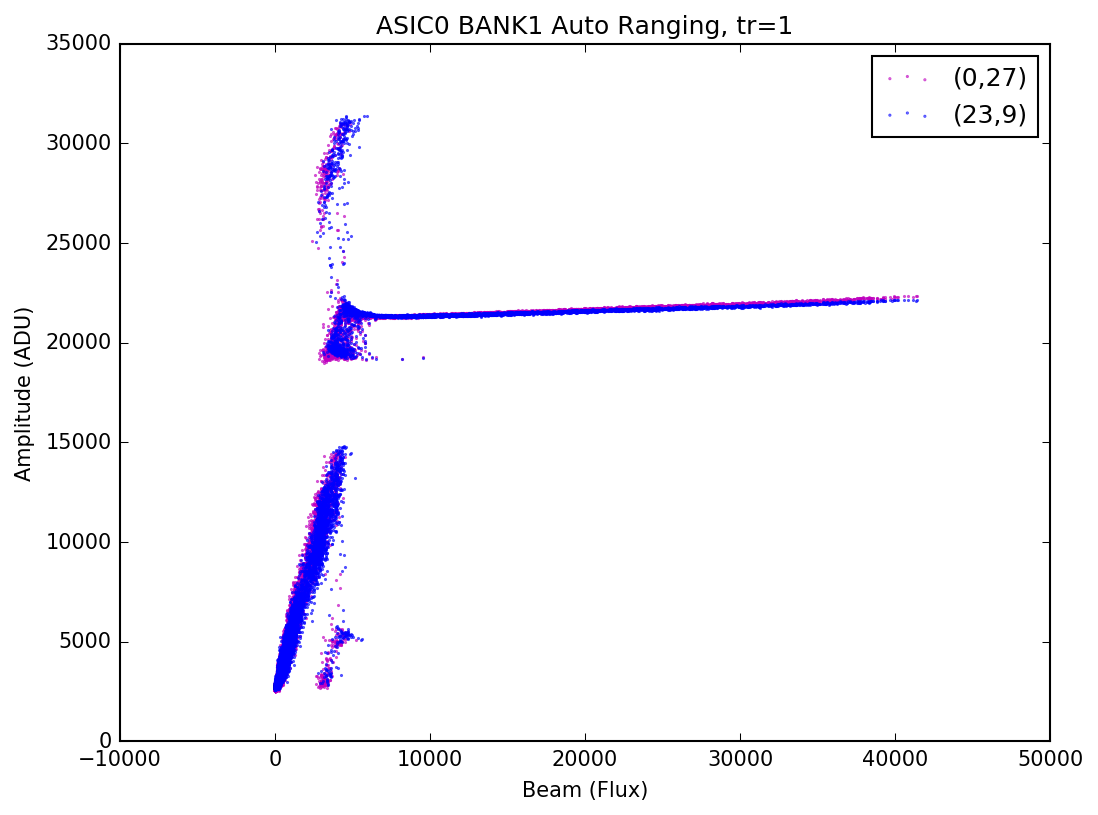

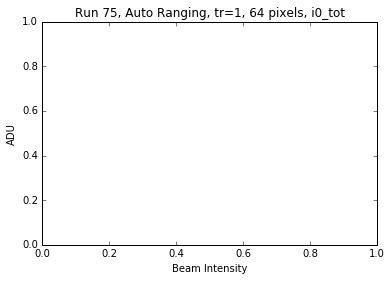

In [139]:
plt.figure(1,figsize=(8,6),dpi=150)
plt.scatter(i0[:,11], iasic[:, 0, 27], color='m', s=1, marker='.', alpha=0.7, label='(0,27)')
plt.scatter(i0[:,11], iasic[:, 23, 9], color='b', s=1, marker='.', alpha=0.7, label='(23,9)')
# plt.scatter(i0[:,11], bnasc[:, 170, 45], color='r', s=1, marker='.', alpha=0.7, label='(170,45)')
# plt.scatter(i0[:,11], bnasc[:, 1, 45], color='g', s=1, marker='.', alpha=0.7, label='(1,45)')

plt.xlabel('Beam (Flux)')
plt.ylabel('Amplitude (ADU)')
plt.title('ASIC0 BANK1 Auto Ranging, tr=1')
plt.legend()
plt.show()

plt.xlabel('Beam Intensity')
plt.ylabel('ADU')
plt.title('Run 75, Auto Ranging, tr=1, 64 pixels, i0_tot')
plt.show()

In [21]:
rows= 176
cols=192
bcols = cols//4
banks=4

In [22]:
# asic = iasic & 0x3FFF
# nasc = asic[:, rows:, cols:]  # lower right
# # nasc = asic[:, :rows, cols:]  # upper right
# # nasc = asic[:, :rows, :cols]  # upper left
# # nasc = asic[:, rows:, :cols]  # lower left

# chip=0
# bank=1
# bnasc = nasc[:, :, bank*bcols:(bank+1)*bcols-1]
# bnasc_flat = bnasc.reshape(bnasc.shape[0], bnasc.shape[2]*bnasc.shape[1])
# plt.figure(1,figsize=(8,6),dpi=150)

# n=bnasc_flat.shape[1]
# color=iter(cm.rainbow(np.linspace(0,1,n)))
# for i in range(n):
#     c=next(color)
#     plt.scatter(i0[:,11], bnasc_flat[:, i], s=1, marker='.', color=c)

# plt.xlabel('Beam Intensity (Flux)')
# plt.ylabel('ADU')
# plt.title('Run 75, Auto Ranging, tr=1, ASIC %d, Bank %d, i0_11' % (chip, bank))
# plt.show()

In [23]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# fig = plt.figure(1,figsize=(8,6),dpi=150)
# ax = Axes3D(fig)

# asic = iasic & 0x3FFF
# nasc = asic[:, rows:, cols:]  # lower right
# # nasc = asic[:, :rows, cols:]  # upper right
# # nasc = asic[:, :rows, :cols]  # upper left
# # nasc = asic[:, rows:, :cols]  # lower left

# chip=0
# bank=1

# bnasc = nasc[:100, :, bank*bcols:(bank+1)*bcols-1]
# bnasc_flat = bnasc.reshape(bnasc.shape[0], bnasc.shape[2]*bnasc.shape[1])

# n=bnasc_flat.shape[1]

# x = np.arange(100)
# print(x.shape)
# z = i0[:100,11]
# print(z.shape)
# color=iter(cm.rainbow(np.linspace(0,1,n)))
# for i in range(n):
#     c=next(color)
#     y = bnasc_flat[:, i]
#     ax.scatter(x, y, z, alpha=0.7, color=c, s=1, marker='.')

# ax.set_xlabel('Time (Frame #)')
# ax.set_ylabel('ADC (ADU)')
# ax.set_zlabel('i0 (Beam)')
# plt.show()


In [50]:
darkfile = np.load('expmfxx32516run74smd_darkfull2.npz', mmap_mode='r')
dimg = darkfile['dark'] & 0x3FFF
iasicm = iasic & 0x3FFF
davg = np.average(dimg, 0)
iasic_nonoise = iasicm - davg
iasic_nonoise.shape
rows= 176
cols=192
bcols = cols//4
banks=4
asic = iasicm
print(asic.shape)

(29403, 352, 384)


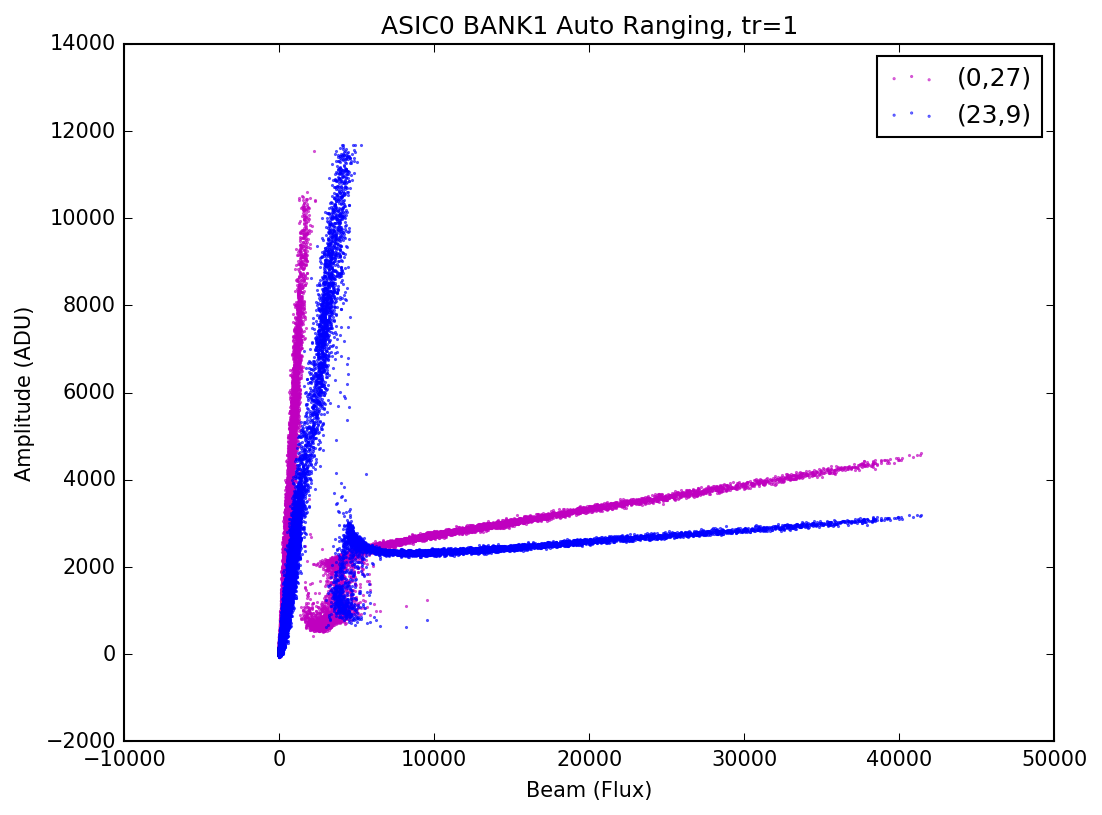

In [140]:
chip = 0
bank = 1

nasc = asic[:, rows:, cols:]  # lower right
drk = dimg[:, rows:, cols:]  # lower right
bnasc = nasc[:, :, bank*bcols:(bank+1)*bcols-1]
bdrk = drk[:, :, bank*bcols:(bank+1)*bcols-1] 
bnasc = bnasc - np.average(bdrk, 0) # remove dark

plt.figure(1,figsize=(8,6),dpi=150)
plt.scatter(i0[:,11], bnasc[:, 0, 27], color='m', s=1, marker='.', alpha=0.7, label='(0,27)')
plt.scatter(i0[:,11], bnasc[:, 23, 9], color='b', s=1, marker='.', alpha=0.7, label='(23,9)')
# plt.scatter(i0[:,11], bnasc[:, 170, 45], color='r', s=1, marker='.', alpha=0.7, label='(170,45)')
# plt.scatter(i0[:,11], bnasc[:, 1, 45], color='g', s=1, marker='.', alpha=0.7, label='(1,45)')

plt.xlabel('Beam (Flux)')
plt.ylabel('Amplitude (ADU)')
plt.title('ASIC0 BANK1 Auto Ranging, tr=1')
plt.legend()
plt.show()

(29403,)


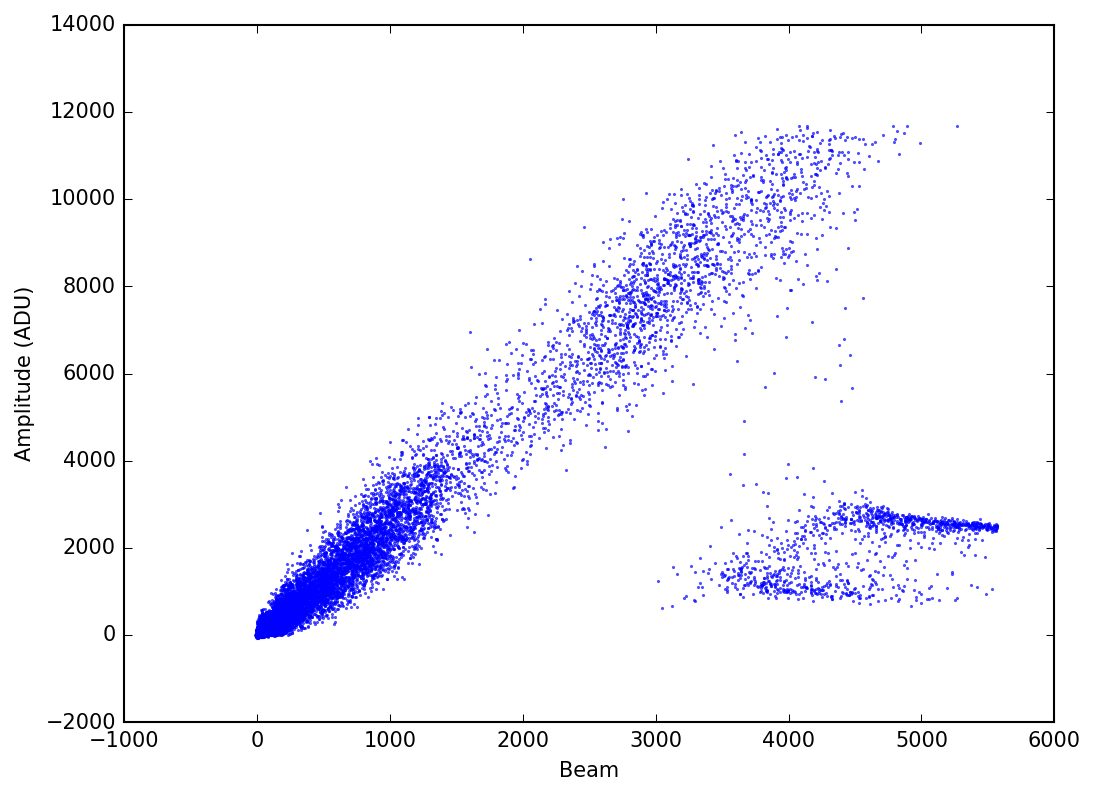

In [136]:
plt.figure(1,figsize=(8,6),dpi=150)
#plt.scatter(i0[:,11], bnasc[:, 0, 27], color='m', s=1, marker='.', alpha=0.7, label='(0,27)')
#plt.scatter(i0[:,11], bnasc[:, 23, 9], color='b', s=1, marker='.', alpha=0.7, label='(23,9)')
# plt.scatter(i0[:,11], bnasc[:, 170, 45], color='r', s=1, marker='.', alpha=0.7, label='(170,45)')
# plt.scatter(i0[:,11], bnasc[:, 1, 45], color='g', s=1, marker='.', alpha=0.7, label='(1,45)')

i0_11_sorted = np.sort(i0[:,11])
i0_11_sorted_idx = np.argsort(i0[:,11])

y = bnasc[i0_11_sorted_idx, 23, 9]
x = i0_11_sorted

print(x.shape)
plt.scatter(x[:24403], y[:24403], color='b', s=1, marker='.', alpha=0.7, label='(0,27)')
plt.xlabel('Beam')
plt.ylabel('Amplitude (ADU)')
#plt.title('ASIC0 BANK1 Auto Ranging, tr=1')
#plt.legend()
plt.show()


[   -67.77570729    -66.77570729    -62.77570729 ...,   9554.22429271
   9993.22429271  10138.22429271]
high gain
slope 2.589
intercept -15.573
R2 0.959
p 0.000
std_err 0.004


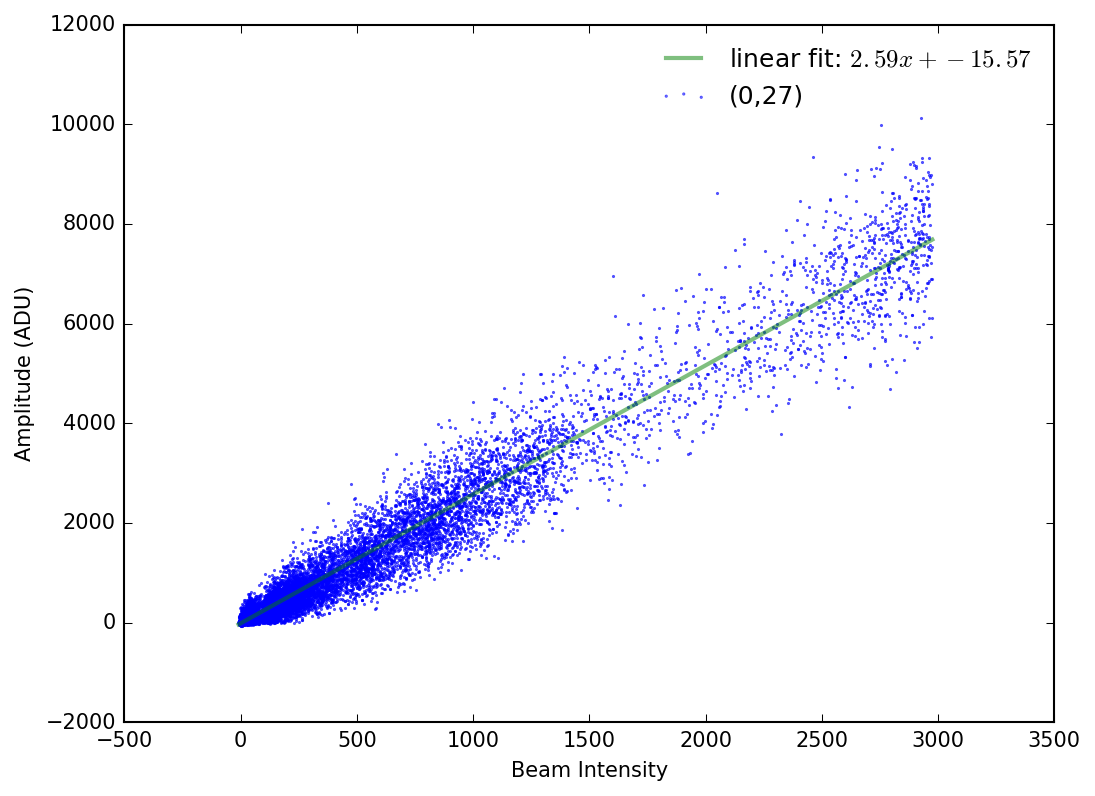

In [117]:
plt.figure(1,figsize=(8,6),dpi=150)
#plt.scatter(i0[:,11], bnasc[:, 0, 27], color='m', s=1, marker='.', alpha=0.7, label='(0,27)')
#plt.scatter(i0[:,11], bnasc[:, 23, 9], color='b', s=1, marker='.', alpha=0.7, label='(23,9)')
# plt.scatter(i0[:,11], bnasc[:, 170, 45], color='r', s=1, marker='.', alpha=0.7, label='(170,45)')
# plt.scatter(i0[:,11], bnasc[:, 1, 45], color='g', s=1, marker='.', alpha=0.7, label='(1,45)')



i0_11_sorted = np.sort(i0[:,11])
i0_11_sorted_idx = np.argsort(i0[:,11])
# print(i0_11_sorted)
# plt.scatter(i0_11_sorted, bnasc[i0_11_sorted_idx, 23, 9], color='b', s=1, marker='.', alpha=0.7, label='(0,27)')


y = bnasc[i0_11_sorted_idx, 23, 9]
x = np.arange(y[:22300].shape[0])
# plt.scatter(x,y[:22300], color='b', s=1, marker='.', alpha=0.7, label='(0,27)')

x = i0_11_sorted[:22300]
print(np.unique(y[:22300]))
#print(y.shape)

plt.scatter(x, y[:22300], color='b', s=1, marker='.', alpha=0.7, label='(0,27)')
plt.xlabel('Beam Intensity')
plt.ylabel('Amplitude (ADU)')
#plt.title('ASIC0 BANK1 Auto Ranging, tr=1')
#plt.legend()
#plt.show()

# lg fit
y = y[:22300]
#x = np.linspace(0, 22300, num=y.shape[0])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('high gain')
print('slope %.3f' % (slope))
print('intercept %.3f' % (intercept))
print('R2 %.3f' % (r_value**2))
print('p %.3f' % (p_value))
print('std_err %.3f' % (std_err))
# make x longer
#x = np.linspace(f0-50, f1+50, num=y.shape[0])
plt.plot(x, intercept+slope*x, 'g-', alpha=0.5, linewidth=2, label='linear fit: ' +r'$%5.2fx+%5.2f$' % (slope, intercept))


plt.legend(frameon=False)
plt.show()


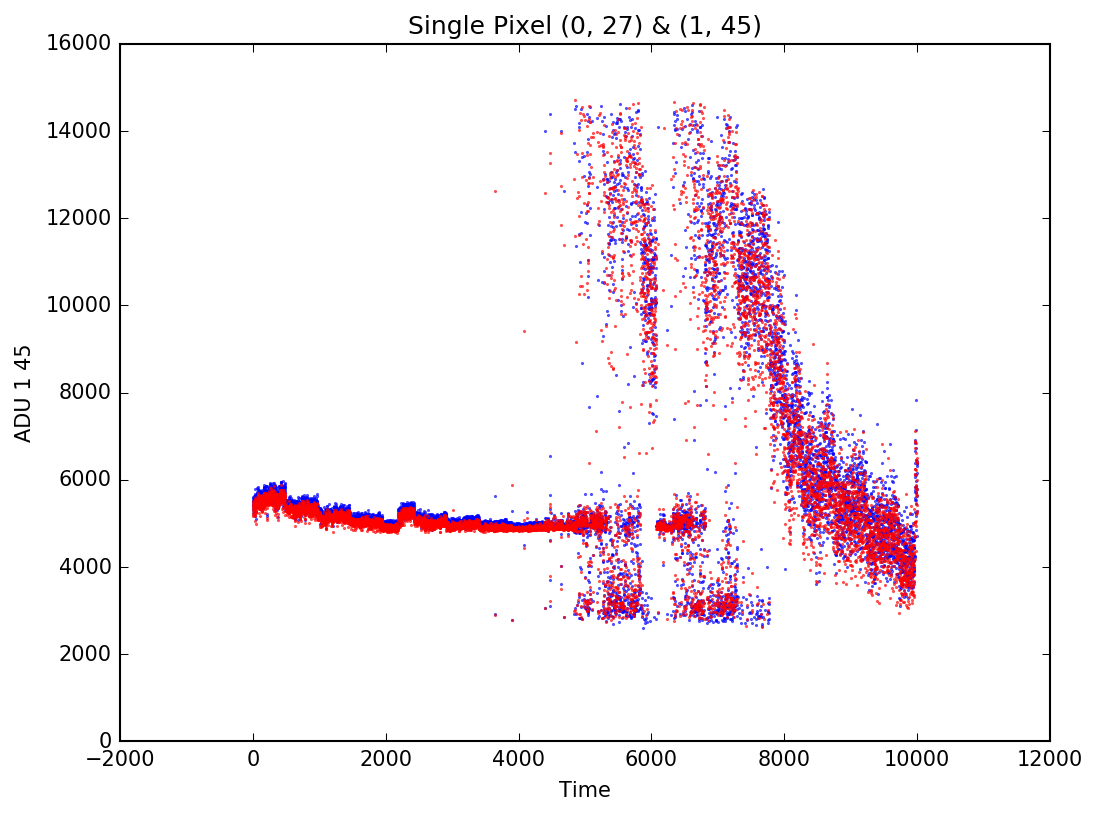

In [52]:
plt.figure(1,figsize=(8,6),dpi=150)
plt.scatter(np.arange(flim), iasic[:flim, 0, 27] & 0x3FFF, color='b', alpha=0.7, label='i0[ch 11]' , s=1, marker='.')
plt.scatter(np.arange(flim), iasic[:flim, 1, 45] & 0x3FFF, color='r', alpha=0.7, label='i0[ch 11]' , s=1, marker='.')

# plt.scatter(iasic[:flim, 0, 27] & 0x3FFF, iasic[:flim, 1, 45] & 0x3FFF, color='r', alpha=0.7, label='i0[ch 11]' , s=1, marker='.')

plt.xlabel('Time')
plt.ylabel('ADU 1 45')
plt.title('Single Pixel (0, 27) & (1, 45)')
plt.show()

In [27]:
# plt.figure(1,figsize=(8,6),dpi=150)
# # plt.scatter(np.arange(flim), iasic[:flim, 0, 27] & 0x3FFF, color='b', alpha=0.7, label='i0[ch 11]' , s=1, marker='.')
# # plt.scatter(np.arange(flim), iasic[:flim, 1, 45] & 0x3FFF, color='r', alpha=0.7, label='i0[ch 11]' , s=1, marker='.')

# plt.scatter(iasic[:flim, 0, 27] & 0x3FFF, iasic[:flim, 1, 45] & 0x3FFF, color='r', alpha=0.7, label='i0[ch 11]' , s=1, marker='.')

# plt.xlabel('ADU 0 27')
# plt.ylabel('ADU 1 45')
# plt.title('Correlation (0, 27) & (1, 45)')
# plt.show()


# plt.figure(1,figsize=(8,6),dpi=150)
# # plt.scatter(np.arange(flim), iasic[:flim, 0, 27] & 0x3FFF, color='b', alpha=0.7, label='i0[ch 11]' , s=1, marker='.')
# # plt.scatter(np.arange(flim), iasic[:flim, 1, 45] & 0x3FFF, color='r', alpha=0.7, label='i0[ch 11]' , s=1, marker='.')

# plt.scatter(dimg[:flim, 0, 27] & 0x3FFF, dimg[:flim, 1, 45] & 0x3FFF, color='r', alpha=0.7, label='i0[ch 11]' , s=1, marker='.')

# plt.xlabel('ADU 0 27')
# plt.ylabel('ADU 1 45')
# plt.title('Correlation (0, 27) & (1, 45)')
# plt.show()

# cor = np.correlate(dimg[:flim, 0, 27] & 0x3FFF, dimg[:flim, 1, 45] & 0x3FFF)
# print(cor)
# print np.corrcoef(dimg[:flim, 0, 27] & 0x3FFF, dimg[:flim, 1, 45] & 0x3FFF)

# # cov = np.cov(dimg[0, :, :] & 0x3FFF)
# # print(cov.shape)
# # plt.figure(1,figsize=(8,6),dpi=150)
# # plt.imshow(cov, cmap=cm.plasma)
# # plt.colorbar()
# # plt.xlabel('Column')
# # plt.ylabel('Row')
# # plt.title('Frames Mean')
# # fig = plt.gcf()
# # plt.show()

In [28]:
calibfile = np.load('expmfxx32516run75smd_10kenv.npz')

envdata = calibfile['env']
# first row is zeros
# second row contains env data
print(envdata.shape)

(29403, 2, 192)


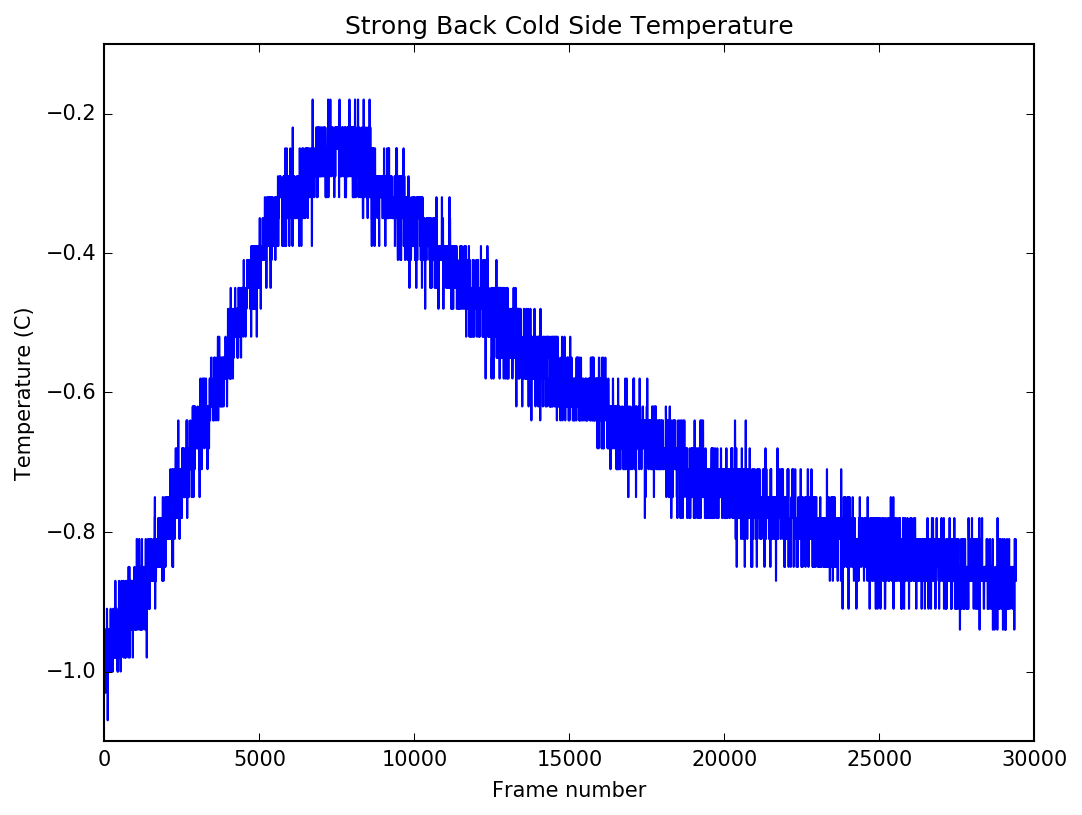

In [34]:
sbcs_temp = envdata[:, 1, 0].astype(np.int32)/100.0
plt.figure(1,figsize=(8,6),dpi=150)
plt.title('Strong Back Cold Side Temperature')
plt.xlabel('Frame number')
plt.ylabel('Temperature (C)')
plt.plot(sbcs_temp)
plt.show()

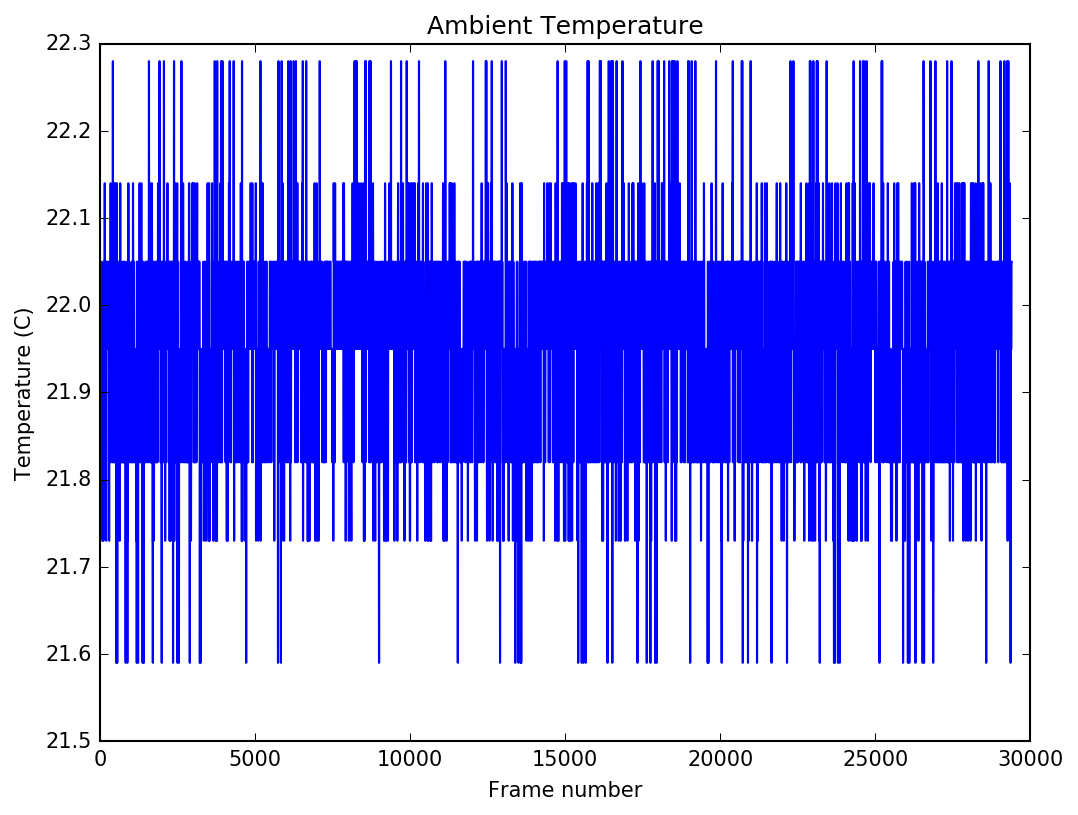

In [35]:
# 1. Ambient temperature in Celcius degree * 100. Signed data.
amb_temp = envdata[:, 1, 1].astype(np.int32)/100.0
plt.figure(1,figsize=(8,6),dpi=150)
plt.title('Ambient Temperature')
plt.xlabel('Frame number')
plt.ylabel('Temperature (C)')
plt.plot(amb_temp)
plt.show()

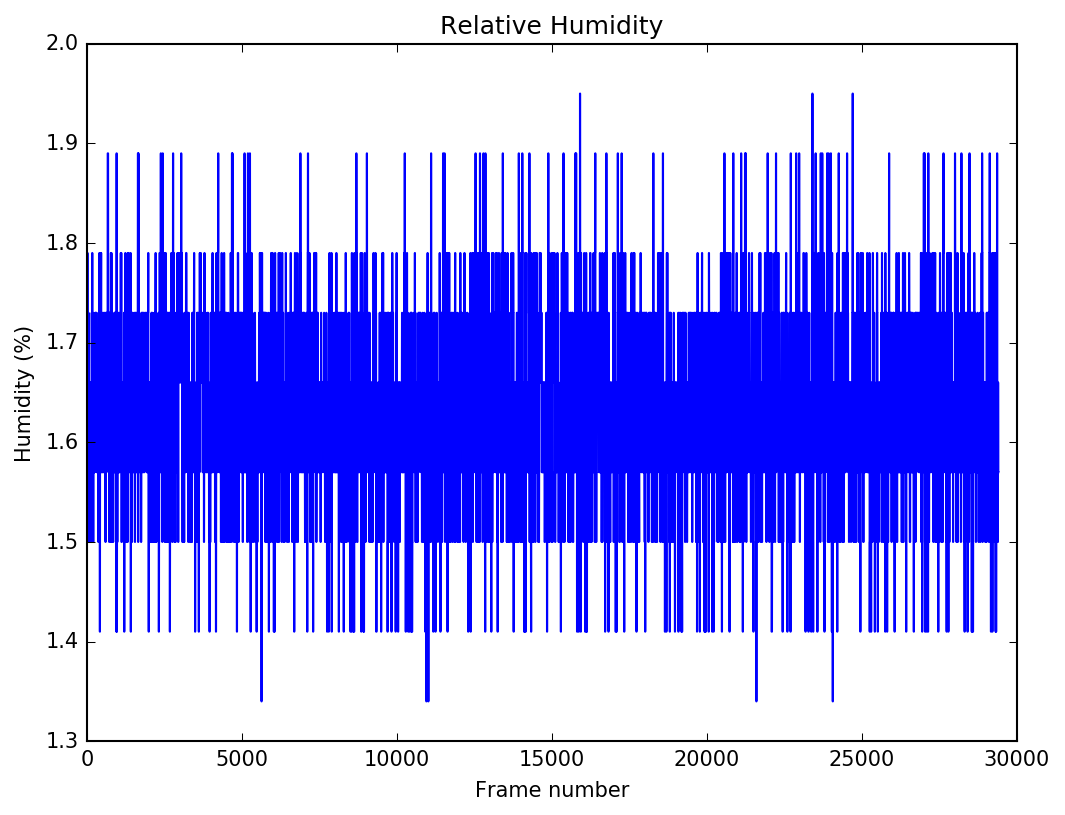

In [36]:
# 2. Relative humidity in percent * 100. Signed data.
humidity = envdata[:, 1, 2].astype(np.int32)/100.0
plt.figure(1,figsize=(8,6),dpi=150)
plt.title('Relative Humidity')
plt.xlabel('Frame number')
plt.ylabel('Humidity (%)')
plt.plot(humidity)
plt.show()

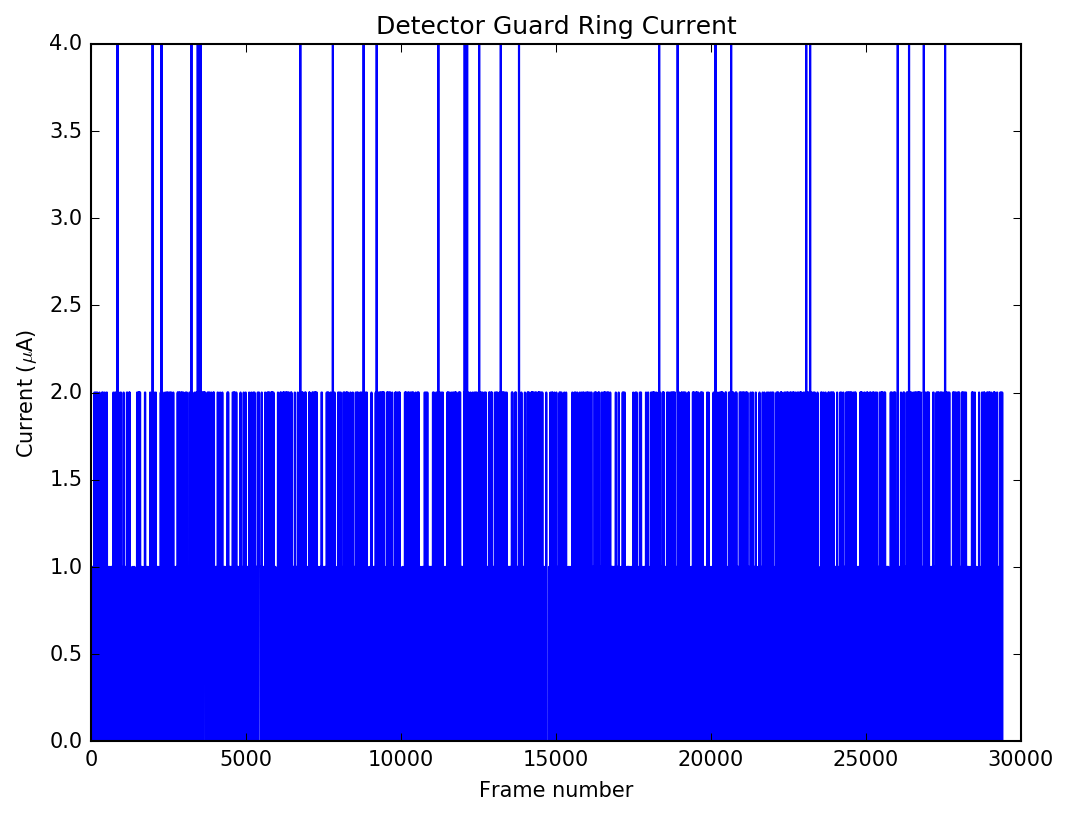

In [37]:
# 5. Detector guard ring current in uA. Unsigned data.
det_gring_i = envdata[:, 1, 5].astype(np.uint32)
plt.figure(1,figsize=(8,6),dpi=150)
plt.title('Detector Guard Ring Current')
plt.xlabel('Frame number')
plt.ylabel(r'Current ($\mu$A)')
plt.plot(det_gring_i)
plt.show()

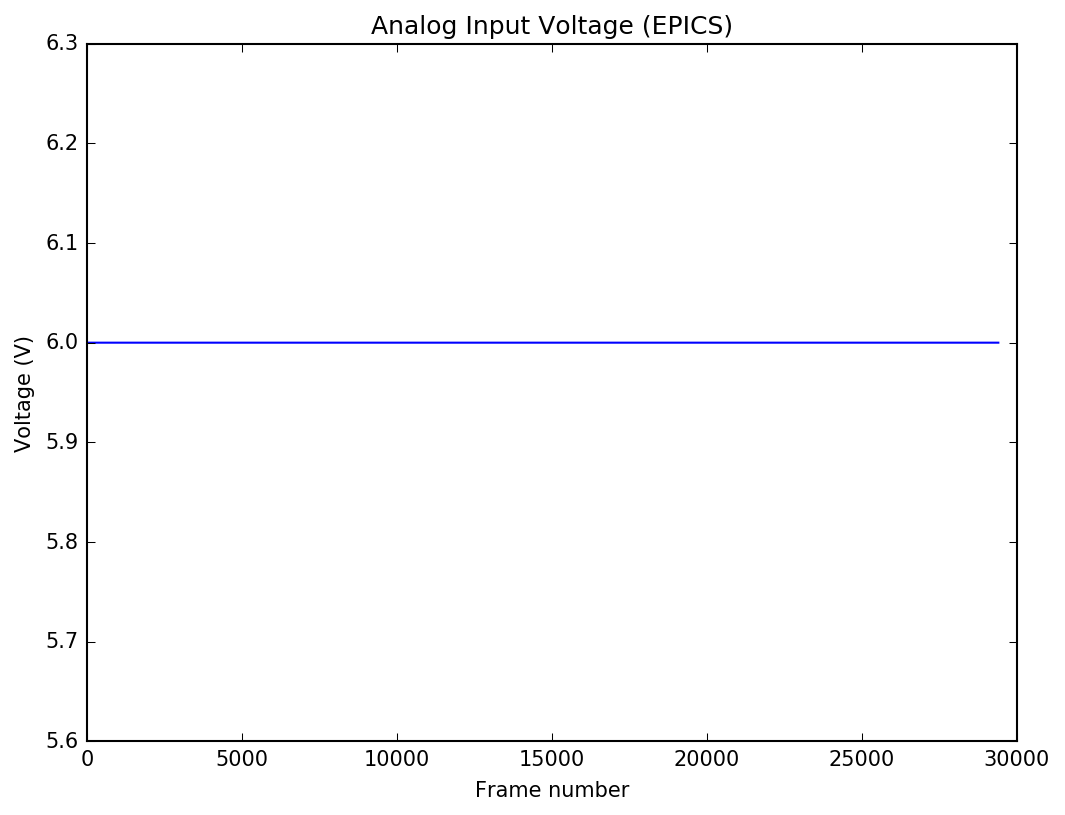

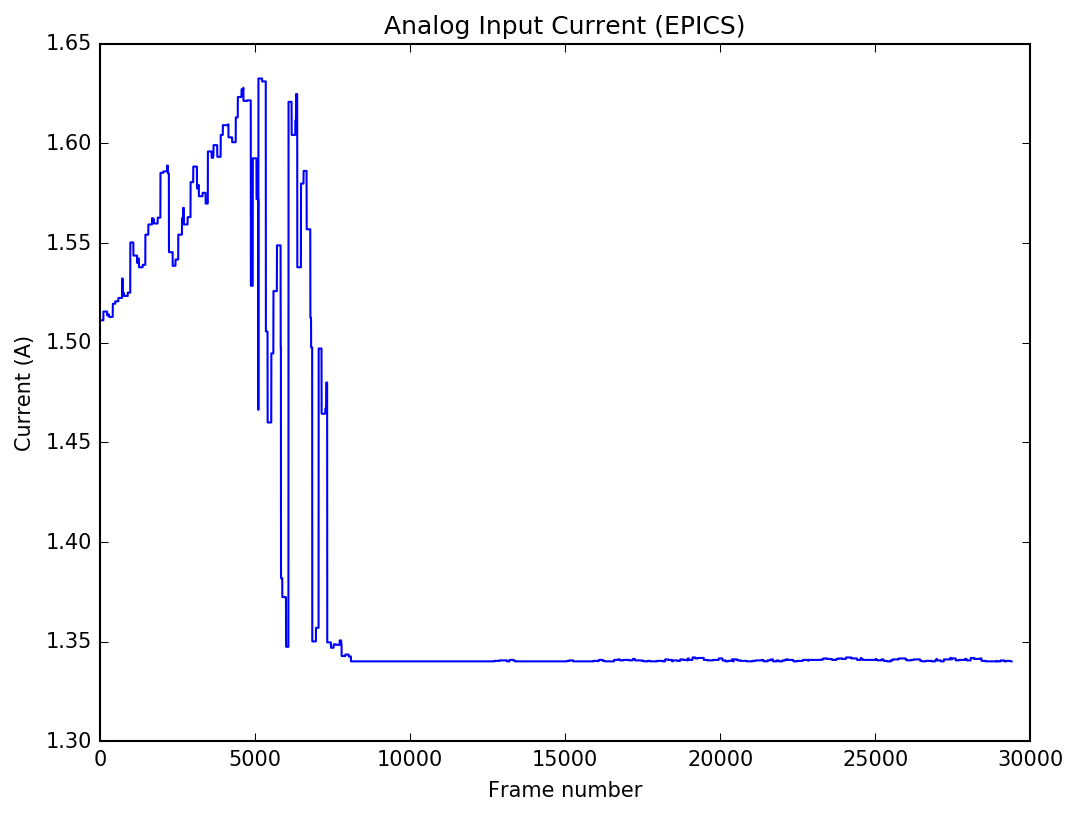

In [38]:
av = calibfile['av']
ai = calibfile['ai']

plt.figure(1,figsize=(8,6),dpi=150)
plt.title('Analog Input Voltage (EPICS)')
plt.xlabel('Frame number')
plt.ylabel('Voltage (V)')
plt.plot(av)
plt.show()

plt.figure(1,figsize=(8,6),dpi=150)
plt.title('Analog Input Current (EPICS)')
plt.xlabel('Frame number')
plt.ylabel('Current (A)')
plt.plot(ai)
plt.show()

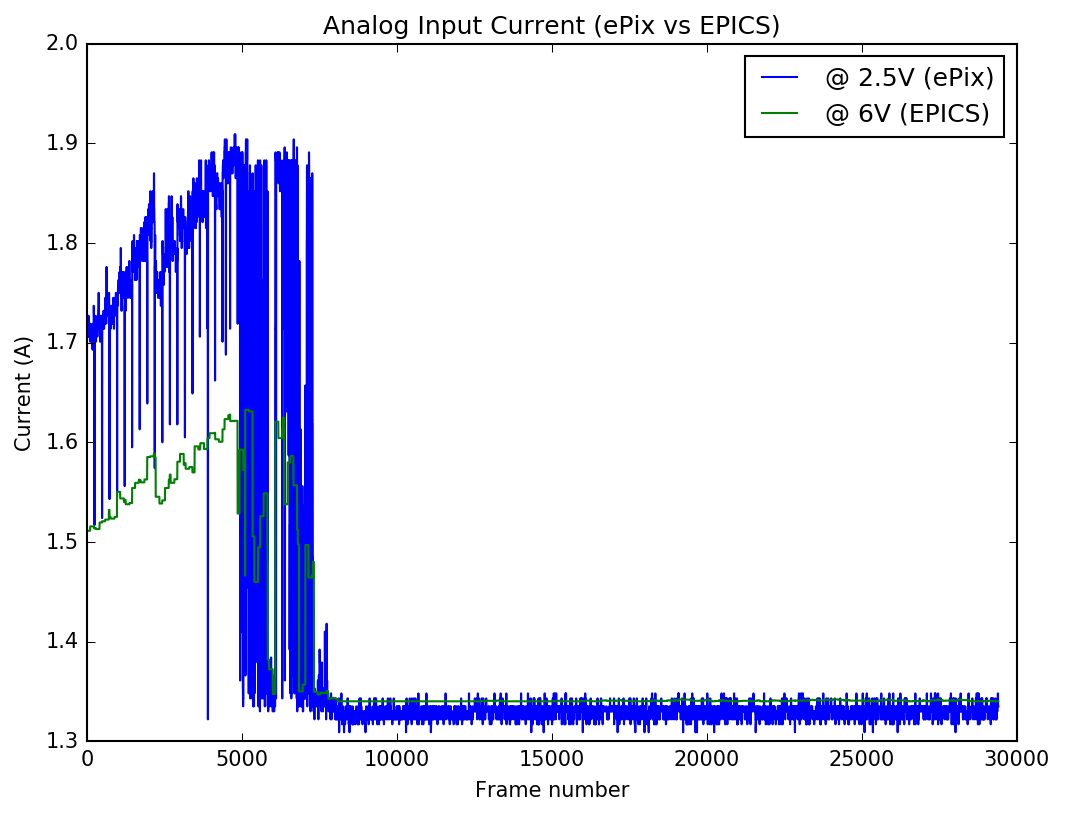

In [39]:
asic_ana_i = envdata[:, 1, 3].astype(np.uint32)/1000.0 # ePix
ai = calibfile['ai']  # EPICS

plt.figure(1,figsize=(8,6),dpi=150)
plt.title('Analog Input Current (ePix vs EPICS)')
plt.xlabel('Frame number')
plt.ylabel('Current (A)')
# plt.plot(ai)
plt.plot(asic_ana_i ,label='@ 2.5V (ePix)')
plt.plot(ai ,label='@ 6V (EPICS)')
plt.legend()
plt.show()


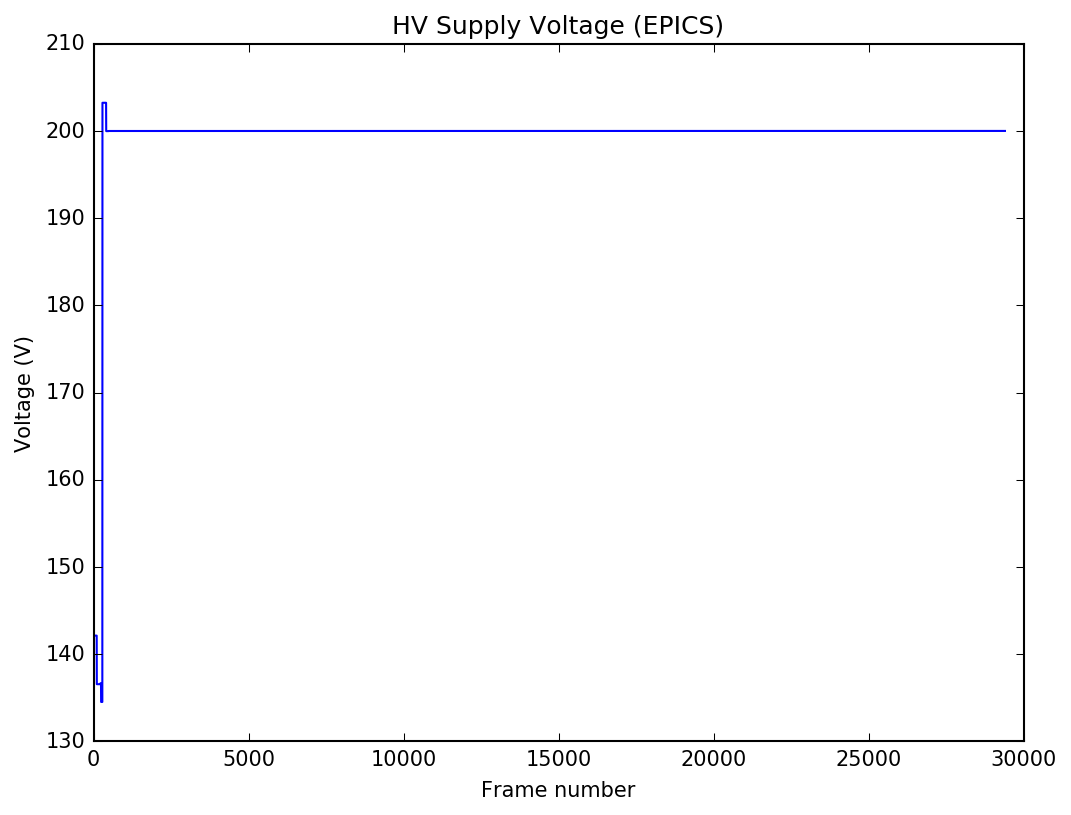

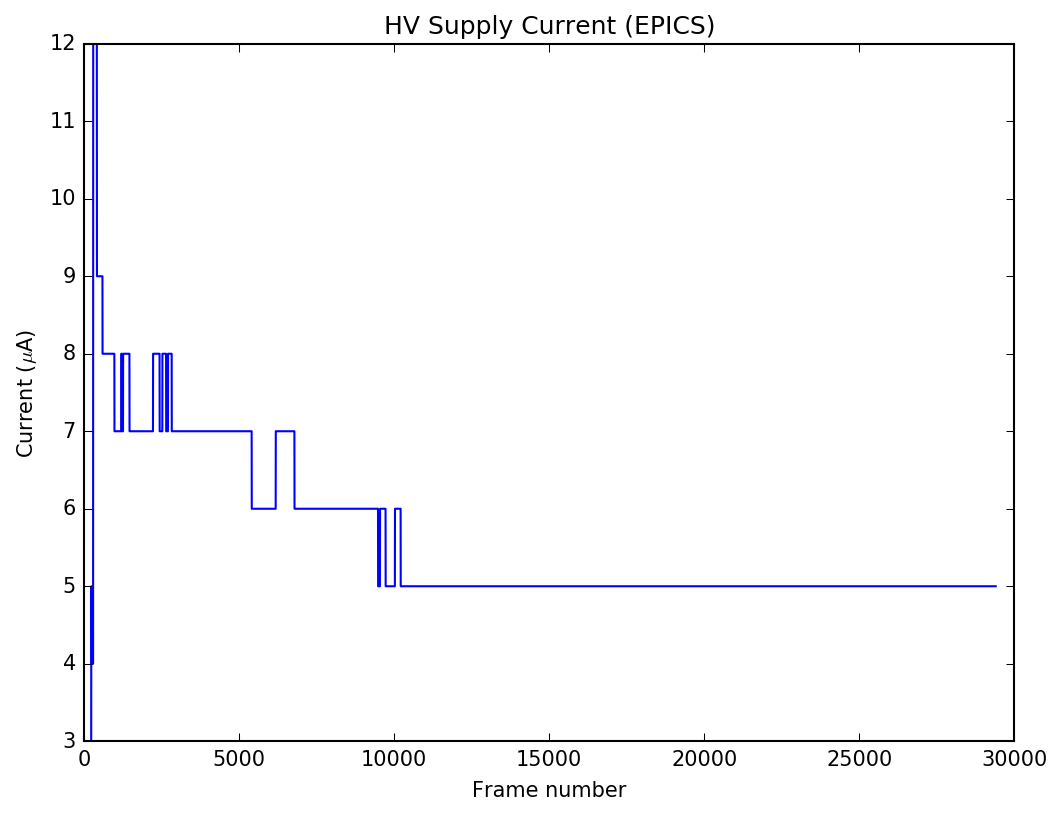

In [43]:
hv = calibfile['hv']
hi = calibfile['hi']

plt.figure(1,figsize=(8,6),dpi=150)
plt.title('HV Supply Voltage (EPICS)')
plt.xlabel('Frame number')
plt.ylabel('Voltage (V)')
plt.plot(hv)
plt.show()

plt.figure(1,figsize=(8,6),dpi=150)
plt.title('HV Supply Current (EPICS)')
plt.xlabel('Frame number')
plt.ylabel('Current ($\mu$A)')
plt.plot(hi*1e6)
plt.show()

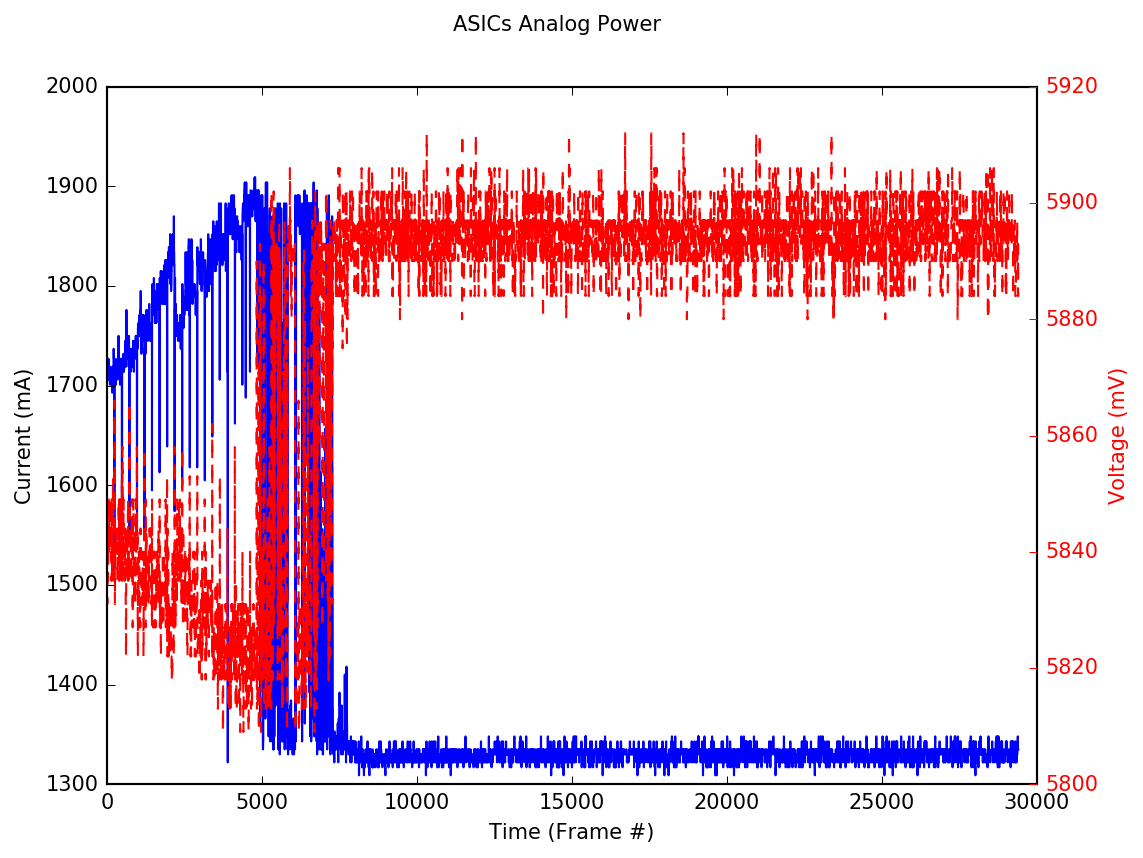

In [29]:
# 3. ASIC analog current in mA. Unsigned data.
asic_ana_i = envdata[:, 1, 3].astype(np.uint32)
# 7. Analog input voltage in mV. Unsigned data.
ana_v = envdata[:, 1, 7].astype(np.uint32)

fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('ASICs Analog Power')

ax1.plot(asic_ana_i)
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Current (mA)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.plot(ana_v, '--r')
ax2.set_ylabel('Voltage (mV)', color='r')
ax2.tick_params('y', colors='r')
plt.show()

### Compare power to region of interest


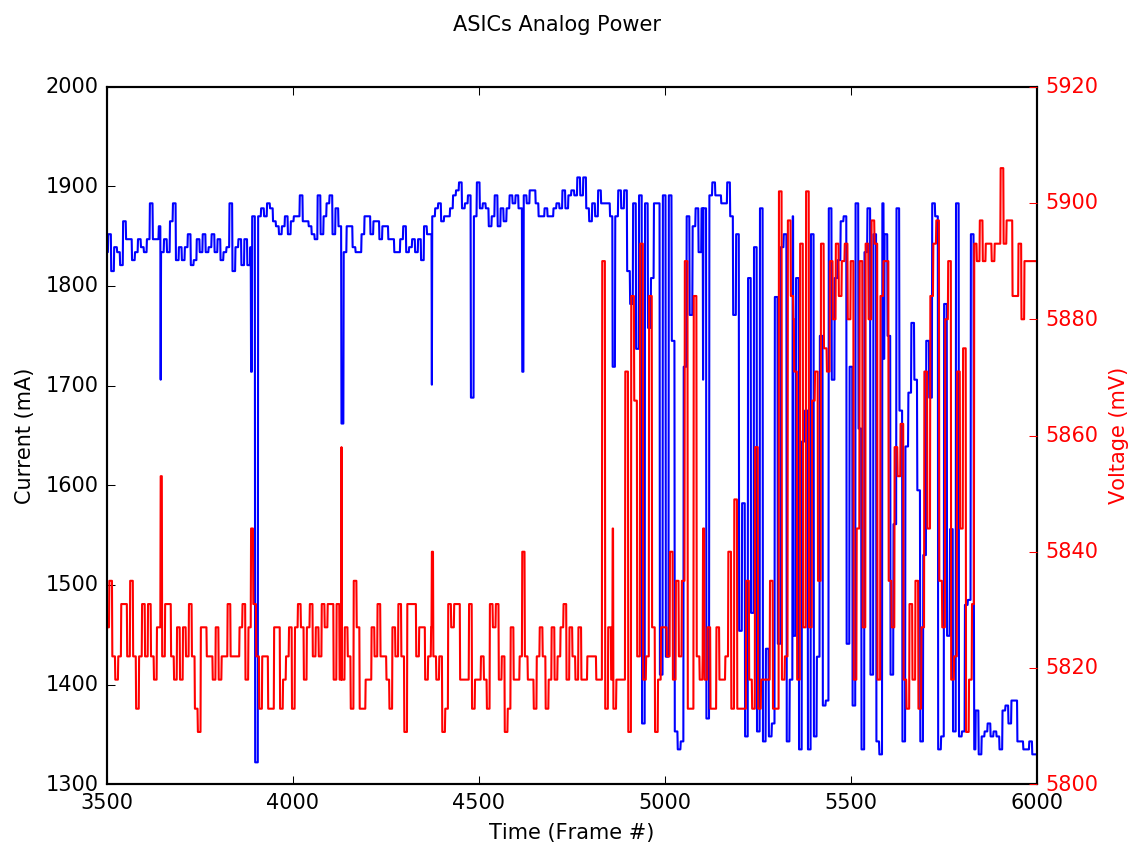

In [30]:
# zoom to region of interest

# set time slice of interest
time_min = 3500
time_max = 6000

# set time slice of interest
time_min = 3500
time_max = 6000
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('ASICs Analog Power')

ax1.plot(np.arange(time_min,time_max), asic_ana_i[time_min:time_max])
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Current (mA)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.plot(np.arange(time_min,time_max), ana_v[time_min:time_max], 'r')
ax2.set_ylabel('Voltage (mV)', color='r')
ax2.tick_params('y', colors='r')
plt.show()

In [44]:
# zoom to region of interest

# set time slice of interest
time_min = 3500
time_max = 6000

# get pixel data
px = iasic[time_min:time_max, px_x, px_y] & DMASK
# get beam intensities
beami0_ch14 = beami0[time_min:time_max,wave8ch]

# get voltage & current
asc_v = ana_v[time_min:time_max]
asc_i = asic_ana_i[time_min:time_max]

hv_vr = hv[time_min:time_max]
hv_ir = hi[time_min:time_max]


# limit beam values
beam_min = 30000
beam_max = 70000

# find the indices to these beam values
badindx = np.where(np.logical_and(beami0_ch14>beam_min, beami0_ch14<beam_max))

# get pixel data @ indices of interest
px_lim = px[badindx[0]]
# get beam data @ indx of interest
bm_lim = beami0_ch14[badindx[0]]
# get voltage and current data of interest
v_lim = asc_v[badindx[0]]
i_lim = asc_i[badindx[0]]
hv_lim = hv_vr[badindx[0]]
hi_lim = hv_ir[badindx[0]]

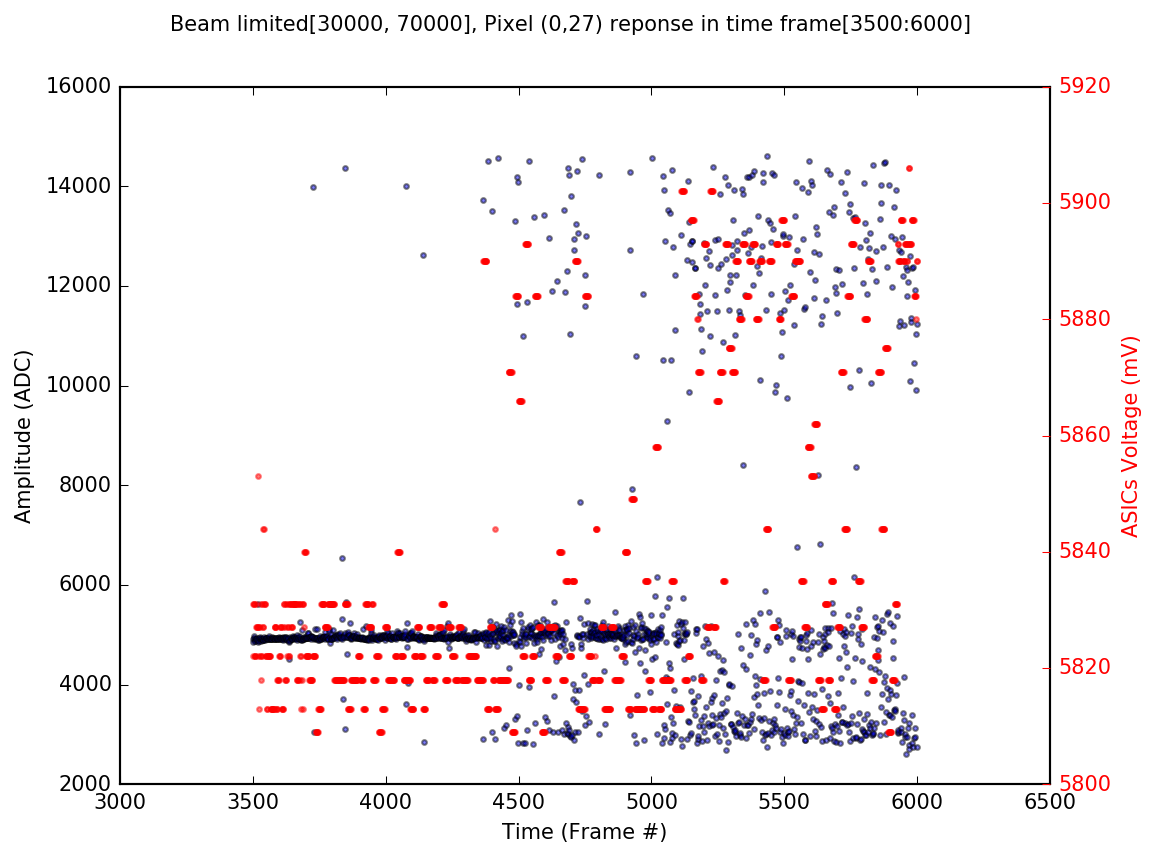

In [32]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Beam limited[%d, %d]' % (beam_min, beam_max) + ', Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

# create a nice x-axis to match time slice
xbeam = np.linspace(time_min,time_max,len(badindx[0]))

ax1.scatter(xbeam, px_lim, alpha=0.5, s=5, marker='o')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(xbeam, v_lim, color='r', alpha=0.5, s=5, marker='o')
ax2.set_ylabel('ASICs Voltage (mV)', color='r')
ax2.tick_params('y', colors='r')

plt.show()

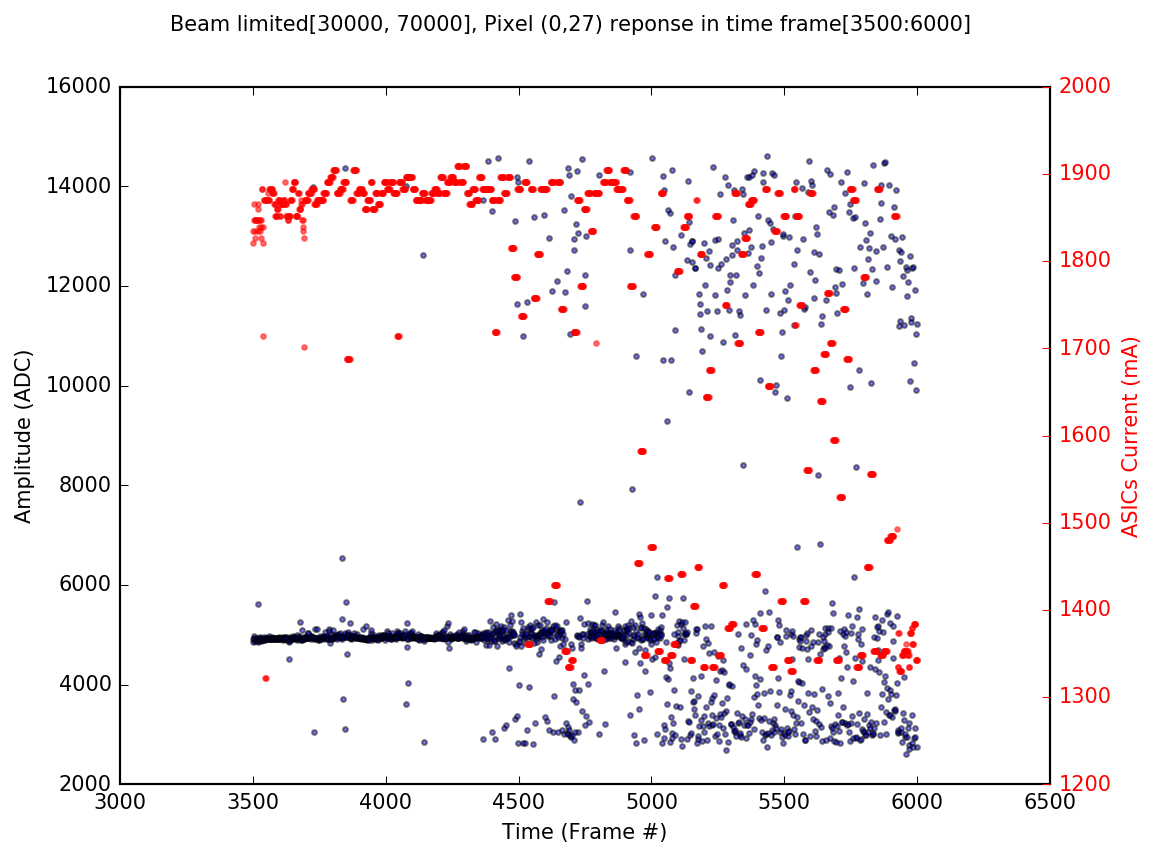

In [33]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Beam limited[%d, %d]' % (beam_min, beam_max) + ', Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

# create a nice x-axis to match time slice
xbeam = np.linspace(time_min,time_max,len(badindx[0]))

ax1.scatter(xbeam, px_lim, alpha=0.5, s=5, marker='o')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(xbeam, i_lim, color='r', alpha=0.5, s=5, marker='o')
ax2.set_ylabel('ASICs Current (mA)', color='r')
ax2.tick_params('y', colors='r')

plt.show()

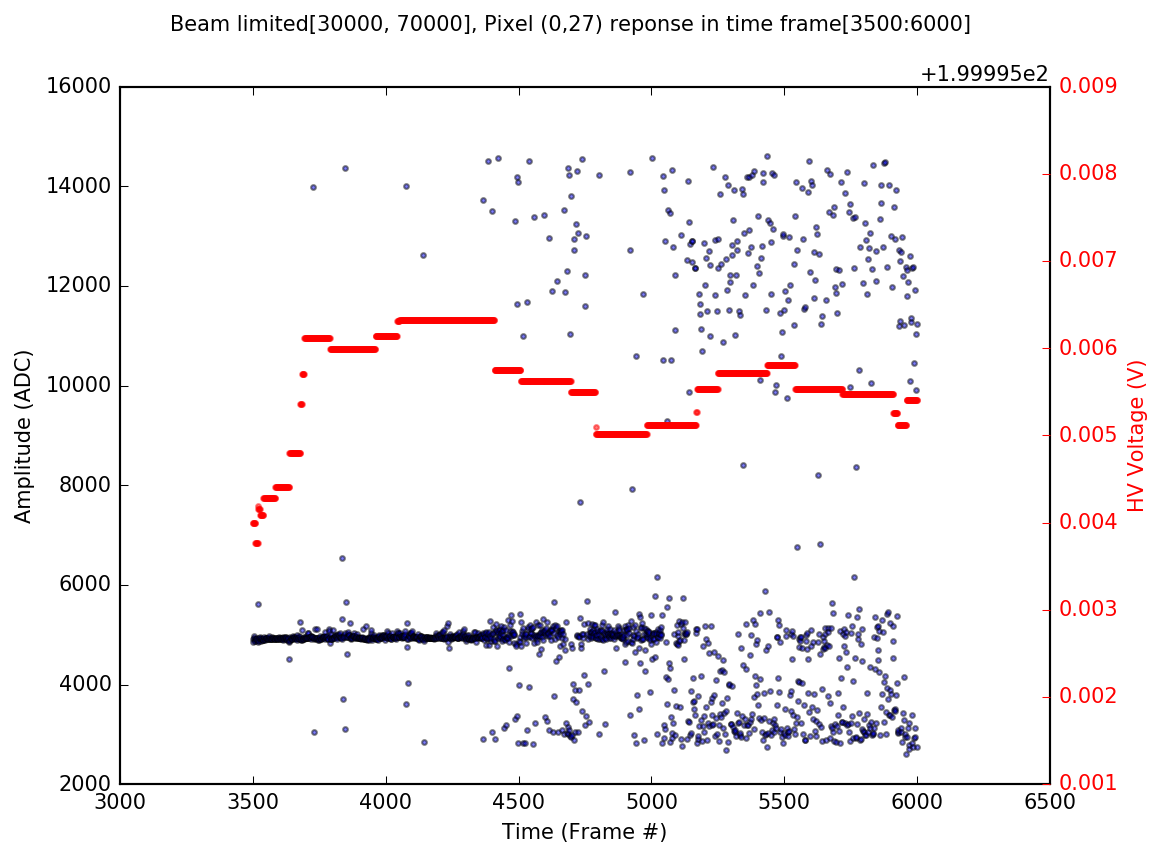

In [47]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Beam limited[%d, %d]' % (beam_min, beam_max) + ', Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

# create a nice x-axis to match time slice
xbeam = np.linspace(time_min,time_max,len(badindx[0]))

ax1.scatter(xbeam, px_lim, alpha=0.5, s=5, marker='o')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(xbeam, hv_lim, color='r', alpha=0.5, s=5, marker='o')
ax2.set_ylabel('HV Voltage (V)', color='r')
ax2.tick_params('y', colors='r')

plt.show()

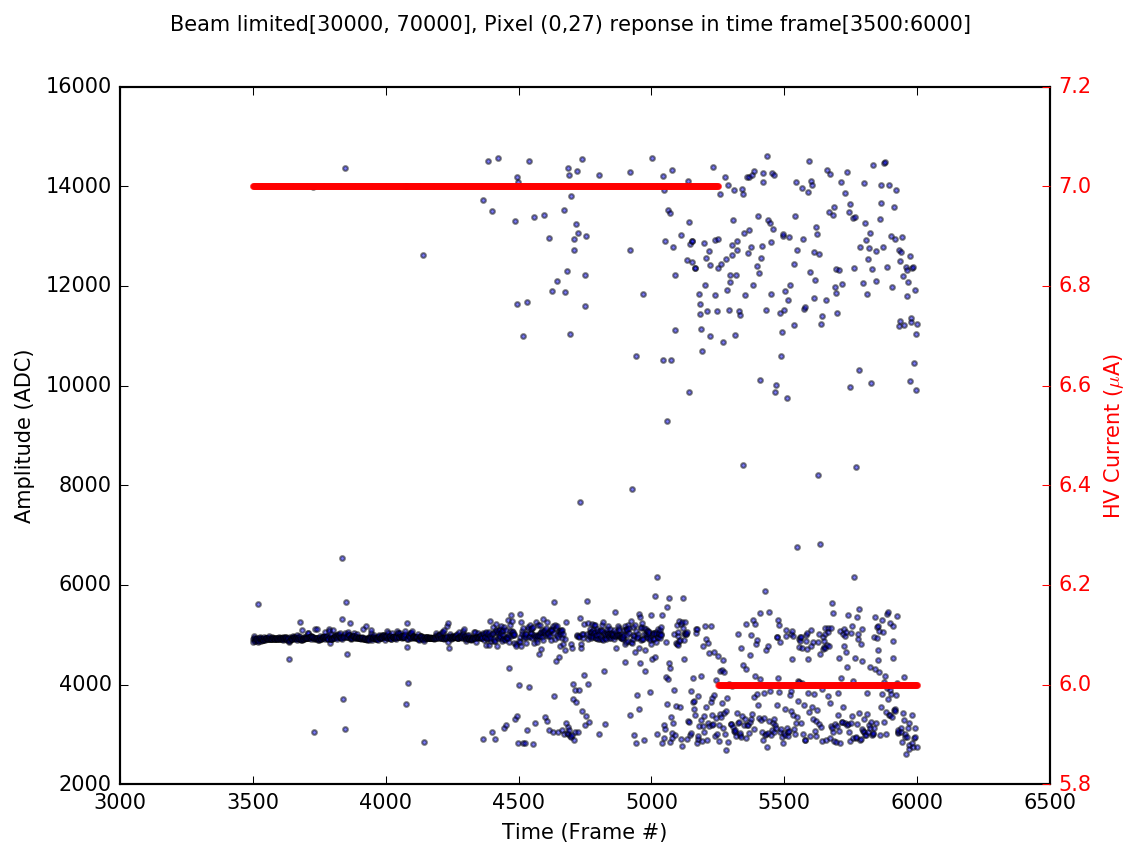

In [49]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(150)
fig.suptitle('Beam limited[%d, %d]' % (beam_min, beam_max) + ', Pixel (%d,%d)' % (px_x, px_y) + ' reponse in time frame[%d:%d]' % (time_min, time_max))

# create a nice x-axis to match time slice
xbeam = np.linspace(time_min,time_max,len(badindx[0]))

ax1.scatter(xbeam, px_lim, alpha=0.5, s=5, marker='o')
ax1.set_xlabel('Time (Frame #)')
ax1.set_ylabel('Amplitude (ADC)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(xbeam, hi_lim*1e6, color='r', alpha=0.5, s=5, marker='o')
ax2.set_ylabel('HV Current ($\mu$A)', color='r')
ax2.tick_params('y', colors='r')

plt.show()

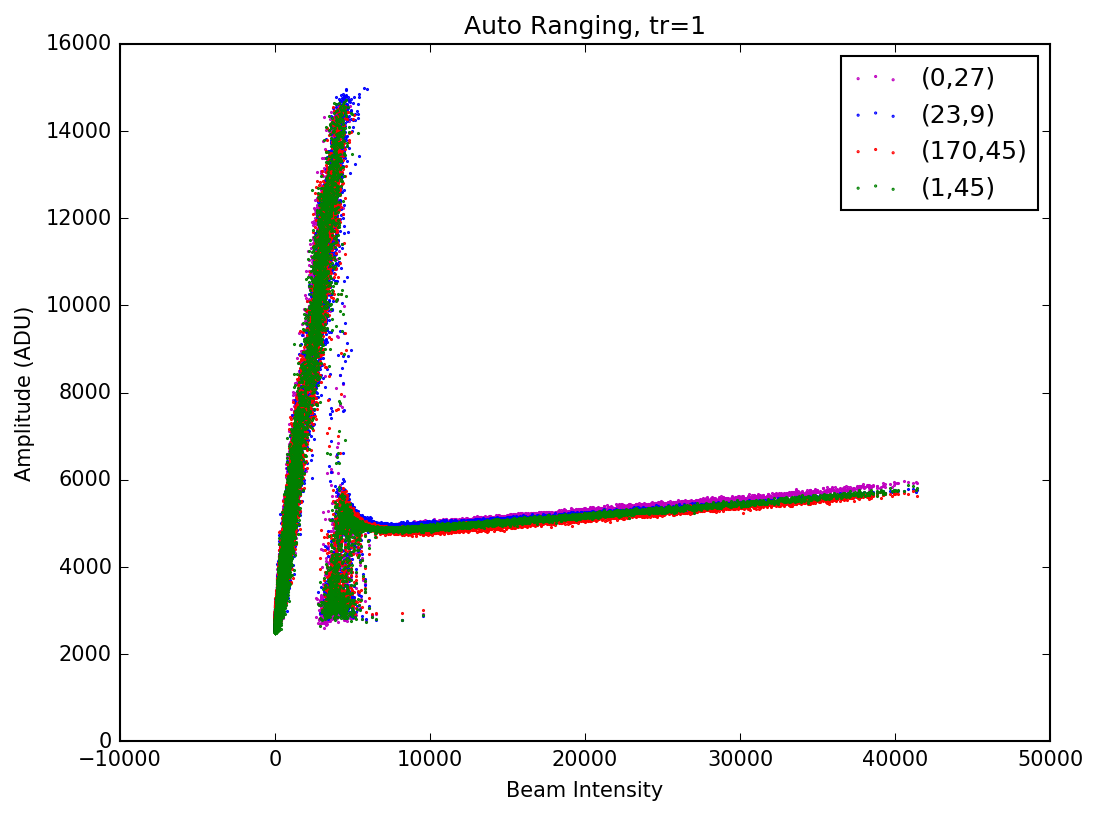

In [66]:
t0 = 0
t1 = 29403

plt.figure(1,figsize=(8,6),dpi=150)
plt.scatter(beami0[t0:,11], iasic[t0:, 0, 27] & 0x3FFF, color='m', s=1, marker='.', label='(0,27)')
plt.scatter(beami0[t0:,11], iasic[t0:, 23, 9] & 0x3FFF, color='b', s=1, marker='.', label='(23,9)')
plt.scatter(beami0[t0:,11], iasic[t0:, 170, 45] & 0x3FFF, color='r', s=1, marker='.', label='(170,45)')
plt.scatter(beami0[t0:,11], iasic[t0:, 1, 45] & 0x3FFF, color='g', s=1, marker='.', label='(1,45)')
plt.legend()
plt.xlabel('Beam Intensity')
plt.ylabel('Amplitude (ADU)')
plt.title('Auto Ranging, tr=1')
#plt.xlim([3000,6500])
plt.show()